# Log Regression

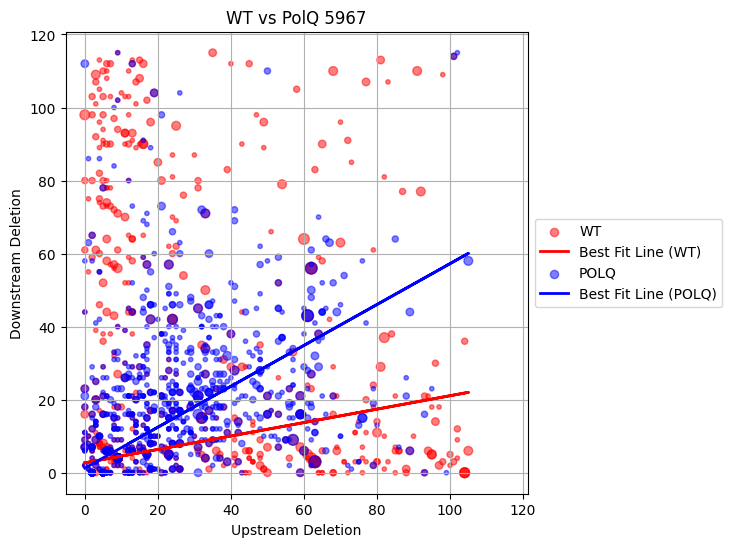

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('WT_PolQ_5967.csv')  # Replace 'your_file.csv' with the path to your CSV file
df.fillna(0, inplace=True)

# Assign variables to columns
upstream_deletion = df['Upstream Deletion']
downstream_deletion = df['Downstream Deletion']
mh_size = df['MH Size']
samples = df['Sample']

# Define colors for samples
sample_colors = {'WT': 'red', 'POLQ': 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))

for sample in df['Sample'].unique():
    mask = df['Sample'] == sample
    sample_df = df[mask]
    upstream_deletion = sample_df['Upstream Deletion']
    downstream_deletion = sample_df['Downstream Deletion']
    plt.scatter(upstream_deletion, downstream_deletion, s=(sample_df['MH Size']*10), c=sample_colors[sample], label=sample, alpha=0.5)
    
    # Perform linear regression
    X = upstream_deletion.values.reshape(-1, 1)
    y = downstream_deletion.values
    weights = sample_df['Count'].values  # Assuming 'weight' is the column representing weights
    reg = LinearRegression().fit(X, y, sample_weight=weights)

    # Plot the best-fit line for the current sample
    plt.plot(X, reg.predict(X), color=sample_colors[sample], linewidth=2, label=f'Best Fit Line ({sample})')

plt.axis('square')
# Add labels and title
plt.xlabel('Upstream Deletion')
plt.ylabel('Downstream Deletion')
plt.title('WT vs PolQ 5967')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.grid(True)
plt.show()


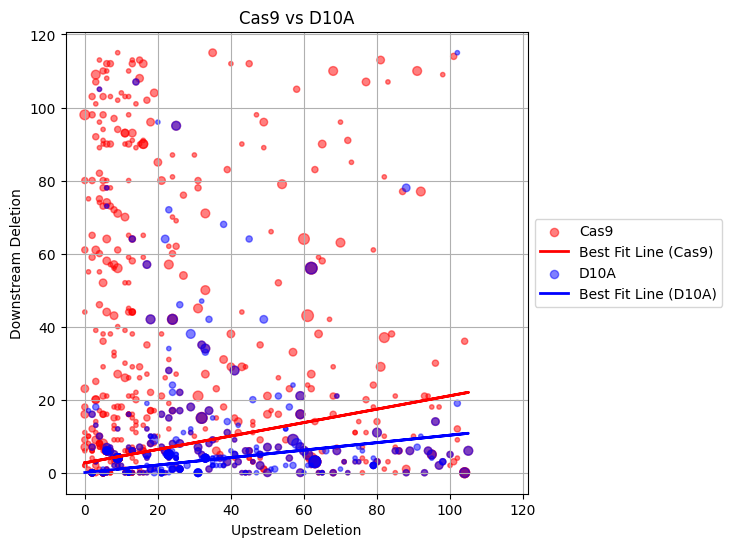

In [46]:
df = pd.read_csv('Cas9vsD10A.csv')  # Replace 'your_file.csv' with the path to your CSV file
df.fillna(0, inplace=True)

# Assign variables to columns
upstream_deletion = df['Upstream Deletion']
downstream_deletion = df['Downstream Deletion']
mh_size = df['MH Size']
samples = df['Sample']

# Define colors for samples
sample_colors = {'Cas9': 'red', 'D10A': 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))

for sample in df['Sample'].unique():
    mask = df['Sample'] == sample
    sample_df = df[mask]
    upstream_deletion = sample_df['Upstream Deletion']
    downstream_deletion = sample_df['Downstream Deletion']
    plt.scatter(upstream_deletion, downstream_deletion, s=(sample_df['MH Size']*10), c=sample_colors[sample], label=sample, alpha=0.5)
    
    # Perform linear regression
    X = upstream_deletion.values.reshape(-1, 1)
    y = downstream_deletion.values
    weights = sample_df['Count'].values  # Assuming 'weight' is the column representing weights
    reg = LinearRegression().fit(X, y, sample_weight=weights)

    # Plot the best-fit line for the current sample
    plt.plot(X, reg.predict(X), color=sample_colors[sample], linewidth=2, label=f'Best Fit Line ({sample})')

plt.axis('square')
# Add labels and title
plt.xlabel('Upstream Deletion')
plt.ylabel('Downstream Deletion')
plt.title('Cas9 vs D10A')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('Cas9vsD10A.csv')  # Replace 'your_file.csv' with the path to your CSV file
df.fillna(0, inplace=True)

# Assign variables to columns
upstream_deletion = df['Upstream Deletion']
downstream_deletion = df['Downstream Deletion']
mh_size = df['MH Size']
samples = df['Sample']

# Define colors for samples
sample_colors = {'Cas9': 'red', 'D10A': 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))

for sample in df['Sample'].unique():
    mask = df['Sample'] == sample
    sample_df = df[mask]
    upstream_deletion = sample_df['Upstream Deletion']
    downstream_deletion = sample_df['Downstream Deletion']
    mh_size = sample_df['MH Size']
    plt.scatter(upstream_deletion, downstream_deletion, s=mh_size, c=sample_colors[sample], label=sample)

    # Perform logistic regression
    X = np.column_stack((upstream_deletion, downstream_deletion))
    y = sample_df['target_column']  # Replace 'target_column' with the name of your target variable
    clf = LogisticRegression().fit(X, y)

    # Plot the decision boundary for the current sample
    coef = clf.coef_[0]
    intercept = clf.intercept_
    line = np.linspace(np.min(upstream_deletion), np.max(upstream_deletion), 100)
    plt.plot(line, -(coef[0]*line + intercept)/coef[1], color=sample_colors[sample], label=f'Decision Boundary ({sample})')

# Add labels and title
plt.xlabel('Upstream Deletion')
plt.ylabel('Downstream Deletion')
plt.title('Multi-variable Scatter Plot with Logistic Regression Decision Boundaries')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

def write_fasta(sequences, filename):
    with open(filename, 'w') as fasta_file:
        for i, seq_array in enumerate(sequences):
            for j, seq in enumerate(seq_array):
                fasta_file.write(">sequence_{}_{}_\n".format(i + 1, j + 1))
                fasta_file.write("{}\n".format(seq))

filtered_insertions = result_df[result_df[column_to_plot] > 5]["Insertion"]
filtered_insertions = result_df[column_to_plot] > 5]

write_fasta(filtered_insertions, filename)
print("FASTA file '{}' created successfully.".format(filename))

# Insertion Extraction

In [396]:
import pandas as pd
import re

# Sample DataFrame
sample = "g3s09"
df = pd.read_csv(f"shibo/freq.{sample}.csv")
filename = f"endseq/g3/{sample}_insertions.fasta"

# Function to parse CIGAR string
def parse_cigar(cigar, seq):
    matches = re.findall(r'(\d+)([A-Za-z])', cigar)
    parsed_data = {
        'Match': [],
        'Insertion': [],
        'InsertionPosition': [],
        'Deletion': [],
        'Matchsize': 0,
        'TotalInsertionSize': 0,
        'InsertionSize': [],
        'DeletionSize': 0,
    }
    seq_index = 0
    position = 0
    
    for length, operation in matches:
        length = int(length)
        if operation == 'M':  # Match
            parsed_data['Match'].append(seq[seq_index:seq_index + length])
            parsed_data['Matchsize'] += length
            seq_index += length
            position += length
        elif operation == 'I':  # Insertion
            parsed_data['Insertion'].append(seq[seq_index:seq_index + length])
            parsed_data['TotalInsertionSize'] += length
            parsed_data['InsertionSize'].append(length)
            parsed_data['InsertionPosition'].append(position)
            seq_index += length
        elif operation == 'D':
            parsed_data['DeletionSize'] += length
    return parsed_data

# Apply parsing function to DataFrame
parsed_data = df.apply(lambda x: parse_cigar(x['CIGAR'], x['Seq']), axis=1)
parsed_df = pd.DataFrame(parsed_data.tolist())

# Concatenate parsed DataFrame with original DataFrame
result_df = pd.concat([df, parsed_df], axis=1)

# Reorder columns
result_df = result_df[['CIGAR', 'Count', 'Seq', 'Match', 'Insertion', 'InsertionPosition', 'Deletion', 'Matchsize', 'TotalInsertionSize','InsertionSize', 'DeletionSize']]

result_df = result_df[result_df["TotalInsertionSize"] >= 5]
result_df = result_df[result_df["DeletionSize"] == 0]

# Open the output FASTA file for writing
with open(filename, "w") as fasta_file:
    # Iterate over the rows of the DataFrame
    for i, row in result_df.iterrows():
        # Extract the insertion sequence and insertion position from the row
        insertion_sequence = row["Insertion"]

        for j, seq in enumerate(insertion_sequence):
            insertion_position = row["InsertionPosition"][j]
            insertion_size = row["InsertionSize"][j]
            insertion_count = row["Count"]
            sequence_name = f"Sequence_{i}_{j}_{insertion_position}_{insertion_count}"
            if insertion_size > 5:
                fasta_file.write(f">{sequence_name}\n")
                fasta_file.write(seq + "\n")

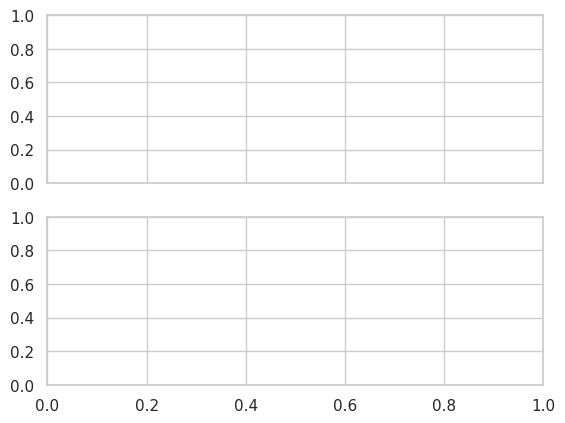

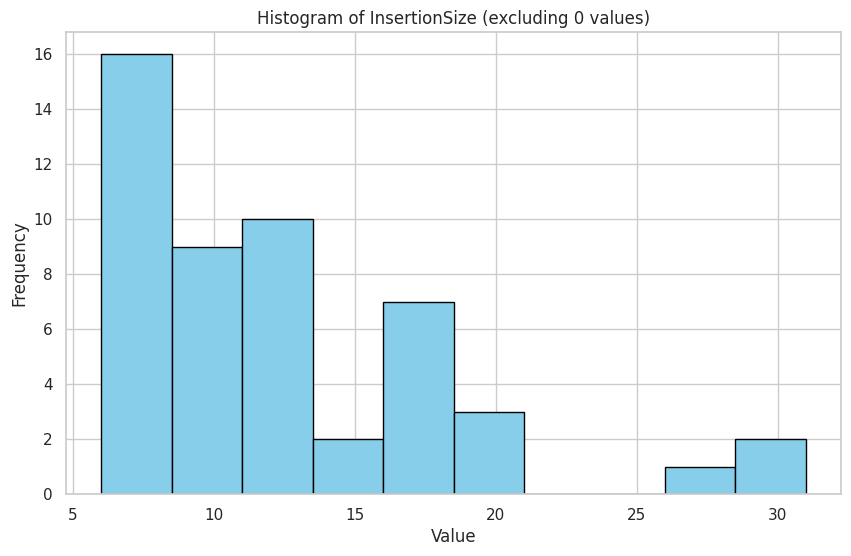

In [236]:
plt.figure(figsize=(10, 6))

column_to_plot = 'InsertionSize'

# Filter out values of 0
filtered_values = result_df[result_df[column_to_plot] > 5][column_to_plot]

# Plot the histogram
plt.hist(filtered_values, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of {} (excluding 0 values)'.format(column_to_plot))
dd
# Show the plot
plt.show()

In [242]:
import pandas as pd

# Sample DataFrame
data = {
    'CIGAR': ['2M1D3M', '3M1I2M'],
    'Seq': ['ACGTACGT', 'ACGTACGT'],
}

df = pd.DataFrame(data)

# Apply parsing function to DataFrame
parsed_data = df.apply(lambda x: parse_cigar(x['CIGAR'], x['Seq']), axis=1)
parsed_df = pd.DataFrame(parsed_data.tolist())

# Concatenate parsed DataFrame with original DataFrame
result_df = pd.concat([df, parsed_df], axis=1)

# Reorder columns
result_df = result_df[['CIGAR', 'Seq', 'Match', 'Insertion', 'Deletion', 'Matchsize', 'InsertionSize', 'DeletionSize']]

print(result_df)

    CIGAR       Seq      Match Insertion Deletion  Matchsize  InsertionSize  \
0  2M1D3M  ACGTACGT  [AC, TAC]        []      [G]          5              0   
1  3M1I2M  ACGTACGT  [ACG, AC]       [T]       []          5              1   

   DeletionSize  
0             1  
1             0  


# Redundant

In [126]:
import plotly.graph_objects as go

import numpy as np

plus = pd.read_csv("endseq/g2s01_insertions_plus.csv",delimiter='\t',header=None)
minus = pd.read_csv("endseq/g2s01_insertions_minus.csv",delimiter='\t',header=None)



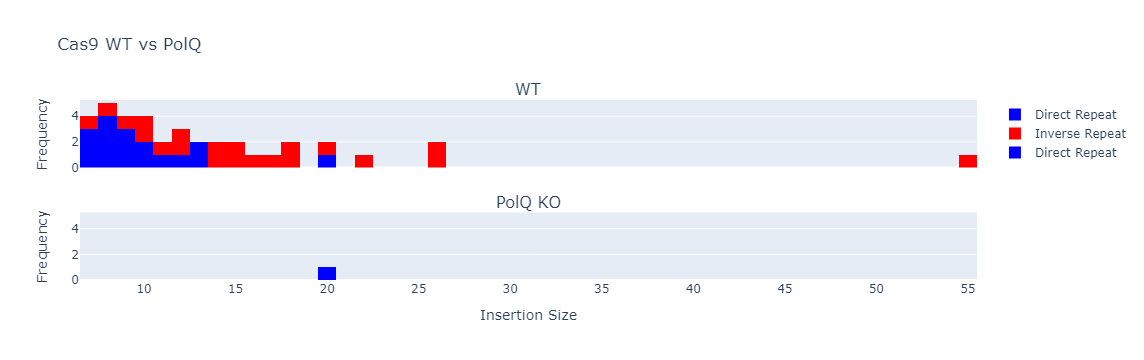

In [183]:
import plotly.graph_objects as go

import numpy as np

plus = pd.read_csv("endseq/g2s01_insertions_plus.csv",delimiter='\t',header=None)
minus = pd.read_csv("endseq/g2s01_insertions_minus.csv",delimiter='\t',header=None)


from plotly.subplots import make_subplots

polqplus = pd.read_csv("endseq/g2s04_insertions_plus.csv",delimiter='\t',header=None)

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("WT", "PolQ KO"))

fig.add_trace(go.Histogram(x=plus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 1, 1)
fig.add_trace(go.Histogram(x=minus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 1, 1)
fig.add_trace(go.Histogram(x=polqplus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 2, 1)

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 WT vs PolQ")

fig.update_xaxes(title_text="Insertion Size", row=2, col=1)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
    }
)
fig.show()

In [187]:

def plot_insertions_histogram(pluspath, minuspath, pqpluspath, pqminuspath, titletext):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("WT", "PolQ KO"))
    if os.path.getsize(pluspath) > 0:
        plus = pd.read_csv(pluspath,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=plus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 1, 1)

    if os.path.getsize(minuspath) > 0:
        minus = pd.read_csv(minuspath,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=minus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 1, 1)
        
    if os.path.getsize(pqpluspath) > 0:
        polqplus = pd.read_csv(pqpluspath,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=polqplus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 2, 1)

    if os.path.getsize(pqminuspath) > 0:
        polqminus = pd.read_csv(pqminuspath,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 2, 1)
    # The two histograms are drawn on top of another
    fig.update_layout(barmode='stack',title_text=titletext)
    
    fig.update_xaxes(title_text="Insertion Size", row=2, col=1)
    
    fig.update_yaxes(title_text="Frequency", row=1, col=1)
    fig.update_yaxes(title_text="Frequency", row=2, col=1)
    
    fig.update_layout(
        {
            "yaxis": {"matches": None},
            "yaxis2": {"matches": "y", "showticklabels": True},
        }
    )
    return fig



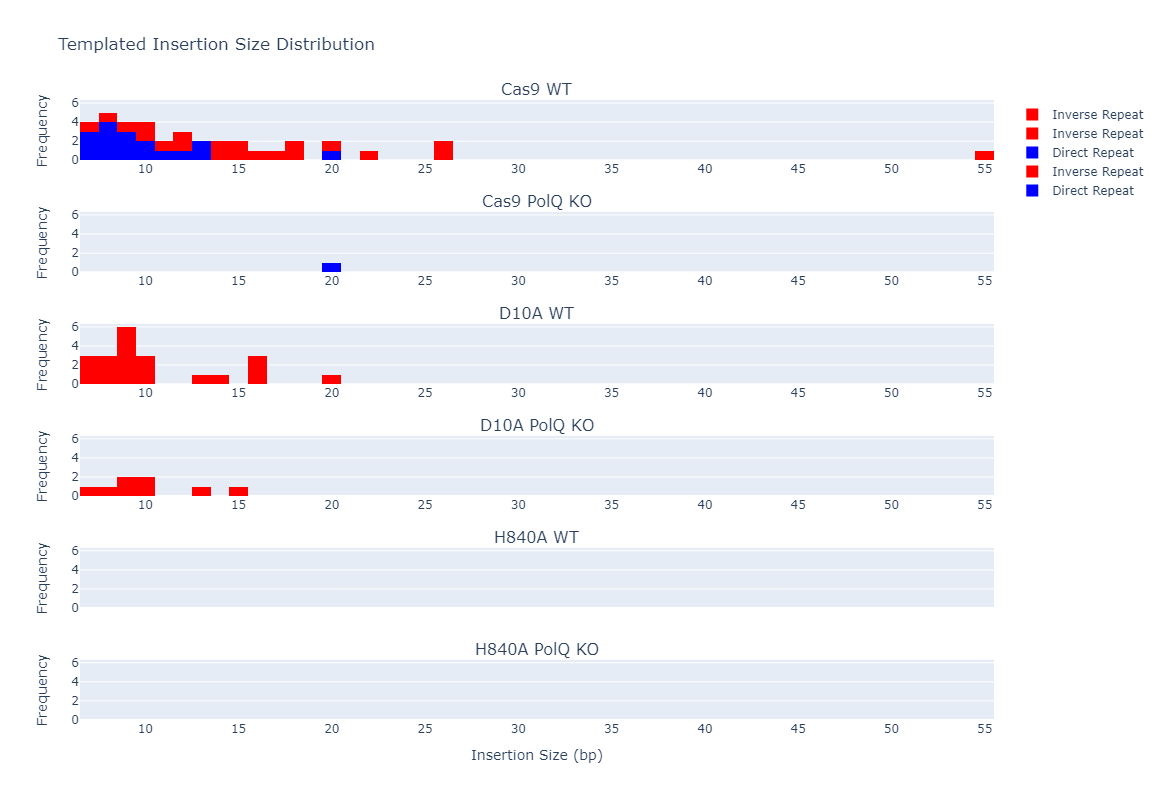

In [213]:
fig = make_subplots(rows=6, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "D10A WT", "D10A PolQ KO", "H840A WT", "H840A PolQ KO"))

g2s01p = "endseq/g2s01_insertions_plus.csv"
g2s02p = "endseq/g2s02_insertions_plus.csv"
g2s03p = "endseq/g2s03_insertions_plus.csv"
g2s04p = "endseq/g2s04_insertions_plus.csv"
g2s05p = "endseq/g2s05_insertions_plus.csv"
g2s06p = "endseq/g2s06_insertions_plus.csv"

g2s01m = "endseq/g2s01_insertions_minus.csv"
g2s02m = "endseq/g2s02_insertions_minus.csv"
g2s03m = "endseq/g2s03_insertions_minus.csv"
g2s04m = "endseq/g2s04_insertions_minus.csv"
g2s05m = "endseq/g2s05_insertions_minus.csv"
g2s06m = "endseq/g2s06_insertions_minus.csv"

if os.path.getsize(g2s01p) > 0:
    plus = pd.read_csv(g2s01p,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=plus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 1, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=1, col=1)

if os.path.getsize(g2s01m) > 0:
    minus = pd.read_csv(g2s01m,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=minus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 1, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=1, col=1)
    
if os.path.getsize(g2s04p) > 0:
    polqplus = pd.read_csv(g2s04p,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqplus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 2, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=2, col=1)

if os.path.getsize(g2s04m) > 0:
    polqminus = pd.read_csv(g2s04m,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 2, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=2, col=1)
    
if os.path.getsize(g2s02p) > 0:
    polqminus = pd.read_csv(g2s02p,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 3, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=3, col=1)
    
if os.path.getsize(g2s02m) > 0:
    polqminus = pd.read_csv(g2s02m,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 3, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=3, col=1)
    
if os.path.getsize(g2s05p) > 0:
    polqminus = pd.read_csv(g2s05p,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 4, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=4, col=1)
    
if os.path.getsize(g2s05m) > 0:
    polqminus = pd.read_csv(g2s05m,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 4, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=4, col=1)
    
if os.path.getsize(g2s03p) > 0:
    polqminus = pd.read_csv(g2s03p,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 5, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=5, col=1)
    
if os.path.getsize(g2s03m) > 0:
    polqminus = pd.read_csv(g2s03m,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 5, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=5, col=1)
    
if os.path.getsize(g2s06p) > 0:
    polqminus = pd.read_csv(g2s06p,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 6, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=6, col=1)
    
if os.path.getsize(g2s06m) > 0:
    polqminus = pd.read_csv(g2s06m,delimiter='\t',header=None)
    fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 6, 1)
else:
    fig.add_trace(go.Histogram(x=[], y=[]), row=6, col=1)
    
# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Templated Insertion Size Distribution")

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)

fig.update_yaxes(title_text="Frequency", row=1, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=2, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=3, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=4, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=5, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=6, col=1, automargin=True)

fig.update_xaxes(title_text="Insertion Size (bp)", row=6, col=1, automargin=True)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
        "yaxis3": {"matches": "y", "showticklabels": True},
        "yaxis4": {"matches": "y", "showticklabels": True},
        "yaxis5": {"matches": "y", "showticklabels": True},
        "yaxis6": {"matches": "y", "showticklabels": True}
    }
)

fig.update_layout(
    {
        "xaxis": {"matches": None, "showticklabels": True},
        "xaxis2": {"matches": "x", "showticklabels": True},
        "xaxis3": {"matches": "x", "showticklabels": True},
        "xaxis4": {"matches": "x", "showticklabels": True},
        "xaxis5": {"matches": "x"},
        "xaxis6": {"matches": "x", "showticklabels": True}
    }
)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

plus = pd.read_csv("endseq/g2s04_insertions_plus.csv",delimiter='\t',header=None)
#minus = pd.read_csv("endseq/g2s04_insertions_minus.csv",delimiter='\t',header=None)

plusdist = plus[8] - 119
#minusdist = minus[8] - 119

fig = go.Figure()

fig.add_trace(go.Histogram(x=plusdist,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')))
fig.add_trace(go.Histogram(x=minusdist,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 WT Distribution Around Breakpoint")
fig.update_layout(xaxis_title="Insertion Distance", yaxis_title="Frequency")
fig.show()

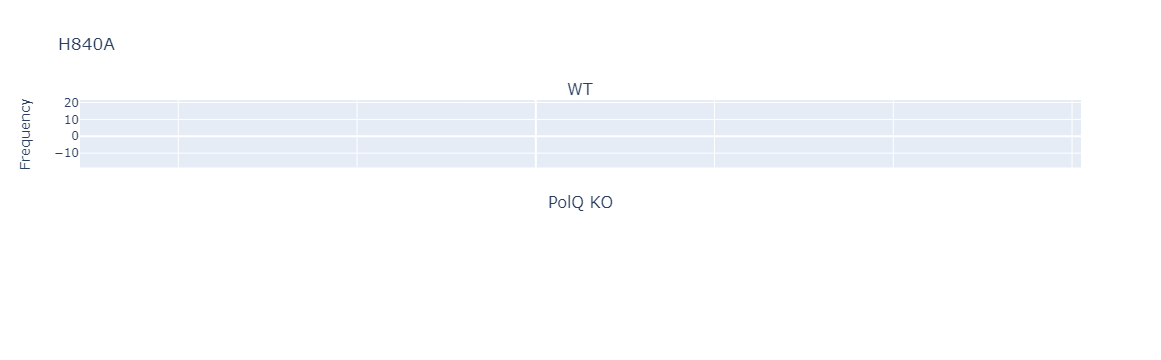

In [189]:
pp = "endseq/g2s03_insertions_plus.csv"
mp = "endseq/g2s03_insertions_plus.csv"
pqpp = "endseq/g2s06_insertions_plus.csv"
pqmp = "endseq/g2s06_insertions_plus.csv"

fig = plot_insertions_histogram(pp, mp, pqpp, pqmp, "H840A")
fig.show()

# Insertion Distribution Graphs

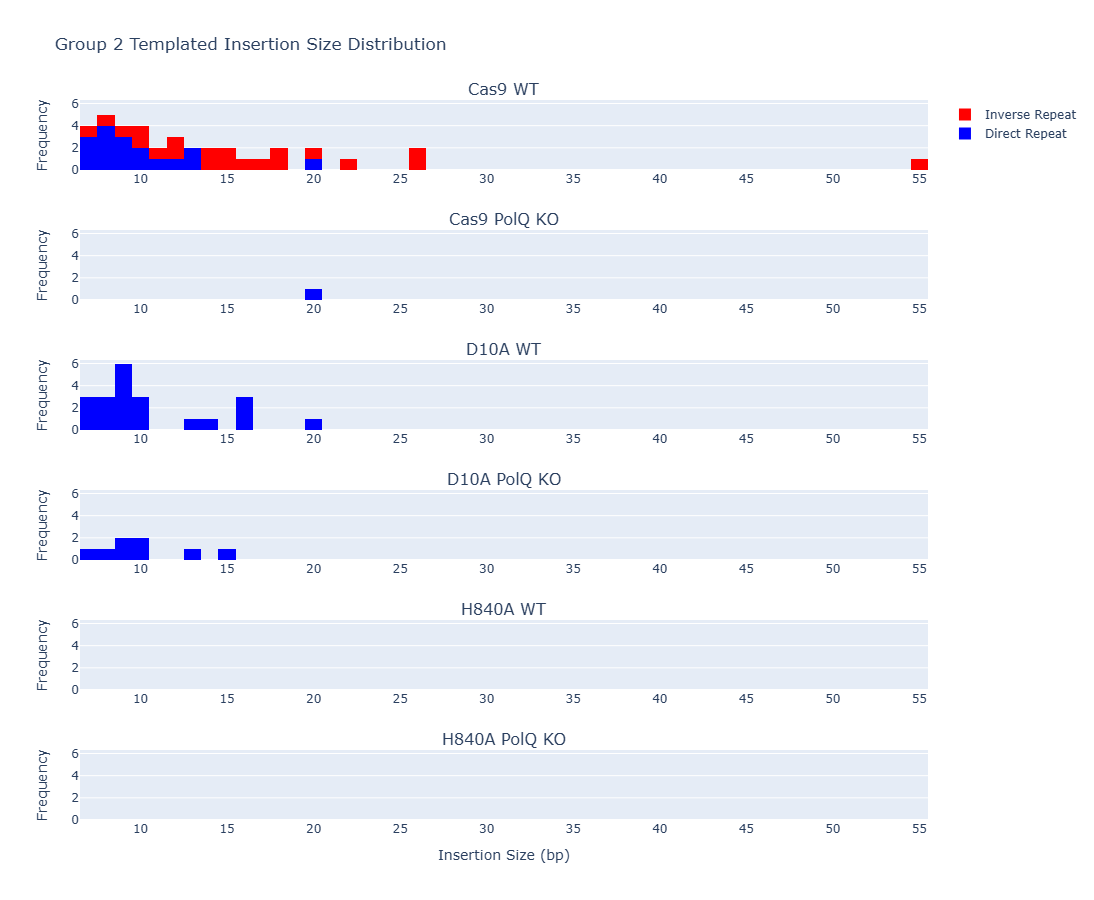

In [285]:
# Iterate over file paths
fig = make_subplots(rows=6, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "D10A WT", "D10A PolQ KO", "H840A WT", "H840A PolQ KO"))

g2s01p = "endseq/g2s01_insertions_plus.csv"
g2s02p = "endseq/g2s02_insertions_plus.csv"
g2s03p = "endseq/g2s03_insertions_plus.csv"
g2s04p = "endseq/g2s04_insertions_plus.csv"
g2s05p = "endseq/g2s05_insertions_plus.csv"
g2s06p = "endseq/g2s06_insertions_plus.csv"

g2s01m = "endseq/g2s01_insertions_minus.csv"
g2s02m = "endseq/g2s02_insertions_minus.csv"
g2s03m = "endseq/g2s03_insertions_minus.csv"
g2s04m = "endseq/g2s04_insertions_minus.csv"
g2s05m = "endseq/g2s05_insertions_minus.csv"
g2s06m = "endseq/g2s06_insertions_minus.csv"

file_paths = [g2s01p, g2s01m, g2s04p, g2s04m, g2s02p, g2s02m, g2s05p, g2s05m, g2s03p, g2s03m, g2s06p, g2s06m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 2 + 1
    # Check if file is not empty
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        # Add histogram trace
        if (i % 2) == 0:
            fig.add_trace(go.Histogram(x=data[3].values, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=1)
            DirectLegend = False
        else:
            fig.add_trace(go.Histogram(x=data[3].values, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       showlegend = InverseLegend,marker=dict(color='red')), row=row, col=1)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Histogram(x=[], y=[]), row=row, col=1)

fig.update_layout(barmode='stack',title_text="Group 2 Templated Insertion Size Distribution")

fig.update_layout(
    autosize=False,
    width=1100,
    height=900,
)

fig.update_yaxes(title_text="Frequency", row=1, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=2, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=3, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=4, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=5, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=6, col=1, automargin=True)

fig.update_xaxes(title_text="Insertion Size (bp)", row=6, col=1, automargin=True)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
        "yaxis3": {"matches": "y", "showticklabels": True},
        "yaxis4": {"matches": "y", "showticklabels": True},
        "yaxis5": {"matches": "y", "showticklabels": True},
        "yaxis6": {"matches": "y", "showticklabels": True}
    }
)

fig.update_layout(
    {
        "xaxis": {"matches": None, "showticklabels": True},
        "xaxis2": {"matches": "x", "showticklabels": True},
        "xaxis3": {"matches": "x", "showticklabels": True},
        "xaxis4": {"matches": "x", "showticklabels": True},
        "xaxis5": {"matches": "x", "showticklabels": True},
        "xaxis6": {"matches": "x", "showticklabels": True}
    }
)

In [423]:
# Iterate over file paths
fig = make_subplots(rows=6, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "D10A WT", "D10A PolQ KO", "H840A WT", "H840A PolQ KO"))

g2s01p = "endseq/g2s01_insertions_plus.csv"
g2s02p = "endseq/g2s02_insertions_plus.csv"
g2s03p = "endseq/g2s03_insertions_plus.csv"
g2s04p = "endseq/g2s04_insertions_plus.csv"
g2s05p = "endseq/g2s05_insertions_plus.csv"
g2s06p = "endseq/g2s06_insertions_plus.csv"

g2s01m = "endseq/g2s01_insertions_minus.csv"
g2s02m = "endseq/g2s02_insertions_minus.csv"
g2s03m = "endseq/g2s03_insertions_minus.csv"
g2s04m = "endseq/g2s04_insertions_minus.csv"
g2s05m = "endseq/g2s05_insertions_minus.csv"
g2s06m = "endseq/g2s06_insertions_minus.csv"

file_paths = [g2s01p, g2s01m, g2s04p, g2s04m, g2s02p, g2s02m, g2s05p, g2s05m, g2s03p, g2s03m, g2s06p, g2s06m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 2 + 1
    # Check if file is not empty
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        # Add histogram trace
        if (i % 2) == 0:
            fig.add_trace(go.box(y=data[3].values))
            DirectLegend = False
        else:
            #fig.add_trace(go.Histogram(x=data[3].values, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       #showlegend = InverseLegend,marker=dict(color='red')), row=row, col=1)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Histogram(x=[], y=[]), row=row, col=1)

fig.update_layout(barmode='stack',title_text="Group 2 Templated Insertion Size Distribution")

fig.update_layout(
    autosize=False,
    width=1100,
    height=900,
)


TypeError: 'module' object is not callable

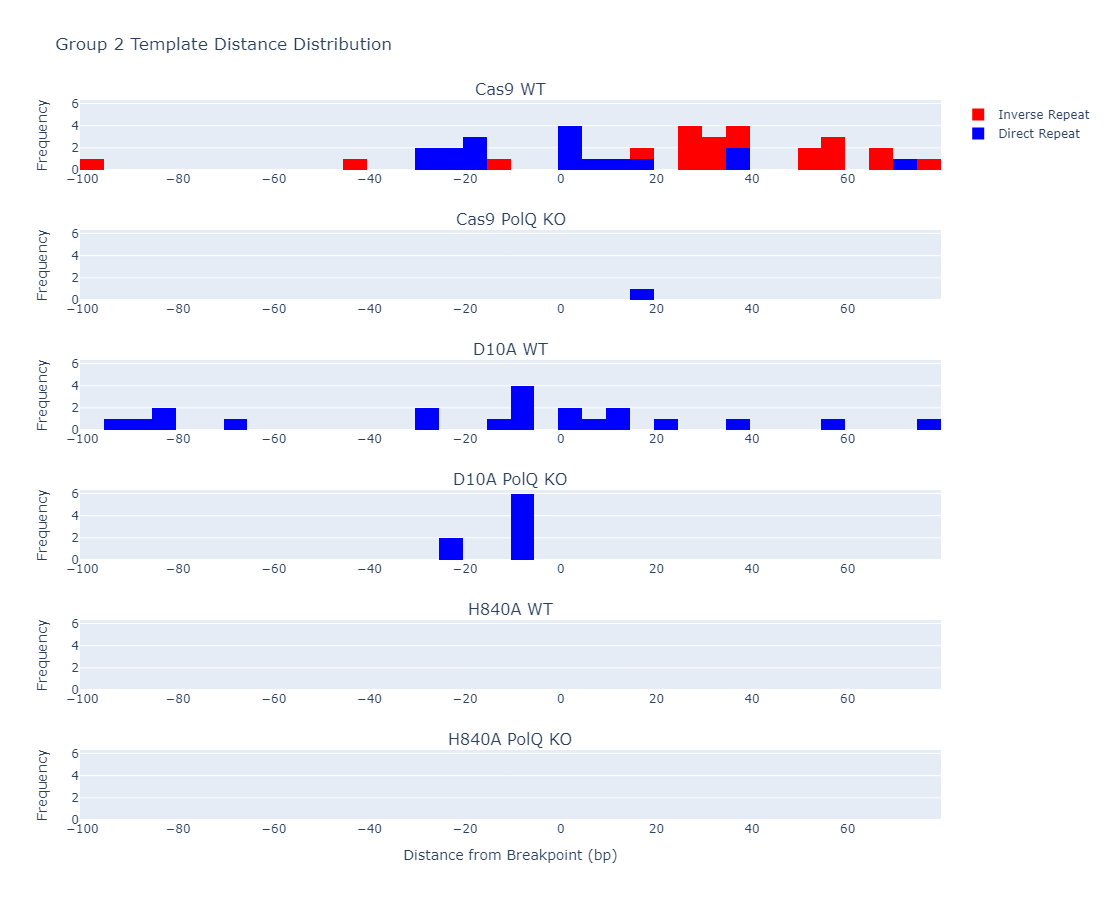

In [286]:
# Iterate over file paths
fig = make_subplots(rows=6, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "D10A WT", "D10A PolQ KO", "H840A WT", "H840A PolQ KO"))

g2s01p = "endseq/g2s01_insertions_plus.csv"
g2s02p = "endseq/g2s02_insertions_plus.csv"
g2s03p = "endseq/g2s03_insertions_plus.csv"
g2s04p = "endseq/g2s04_insertions_plus.csv"
g2s05p = "endseq/g2s05_insertions_plus.csv"
g2s06p = "endseq/g2s06_insertions_plus.csv"

g2s01m = "endseq/g2s01_insertions_minus.csv"
g2s02m = "endseq/g2s02_insertions_minus.csv"
g2s03m = "endseq/g2s03_insertions_minus.csv"
g2s04m = "endseq/g2s04_insertions_minus.csv"
g2s05m = "endseq/g2s05_insertions_minus.csv"
g2s06m = "endseq/g2s06_insertions_minus.csv"

file_paths = [g2s01p, g2s01m, g2s04p, g2s04m, g2s02p, g2s02m, g2s05p, g2s05m, g2s03p, g2s03m, g2s06p, g2s06m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 2 + 1
    # Check if file is not empty
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        dist = data[8] - 119
        # Add histogram trace
        if (i % 2) == 0:
            fig.add_trace(go.Histogram(x=dist, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=1)
            DirectLegend = False
        else:
            fig.add_trace(go.Histogram(x=dist, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       showlegend = InverseLegend,marker=dict(color='red')), row=row, col=1)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Histogram(x=[], y=[]), row=row, col=1)

fig.update_layout(barmode='stack',title_text="Group 2 Template Distance Distribution")

fig.update_layout(
    autosize=False,
    width=1100,
    height=900,
)

fig.update_yaxes(title_text="Frequency", row=1, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=2, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=3, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=4, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=5, col=1, automargin=True)
fig.update_yaxes(title_text="Frequency", row=6, col=1, automargin=True)

fig.update_xaxes(title_text="Distance from Breakpoint (bp)", row=6, col=1, automargin=True)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
        "yaxis3": {"matches": "y", "showticklabels": True},
        "yaxis4": {"matches": "y", "showticklabels": True},
        "yaxis5": {"matches": "y", "showticklabels": True},
        "yaxis6": {"matches": "y", "showticklabels": True}
    }
)

fig.update_layout(
    {
        "xaxis": {"matches": None, "showticklabels": True},
        "xaxis2": {"matches": "x", "showticklabels": True},
        "xaxis3": {"matches": "x", "showticklabels": True},
        "xaxis4": {"matches": "x", "showticklabels": True},
        "xaxis5": {"matches": "x", "showticklabels": True},
        "xaxis6": {"matches": "x", "showticklabels": True}
    }
)

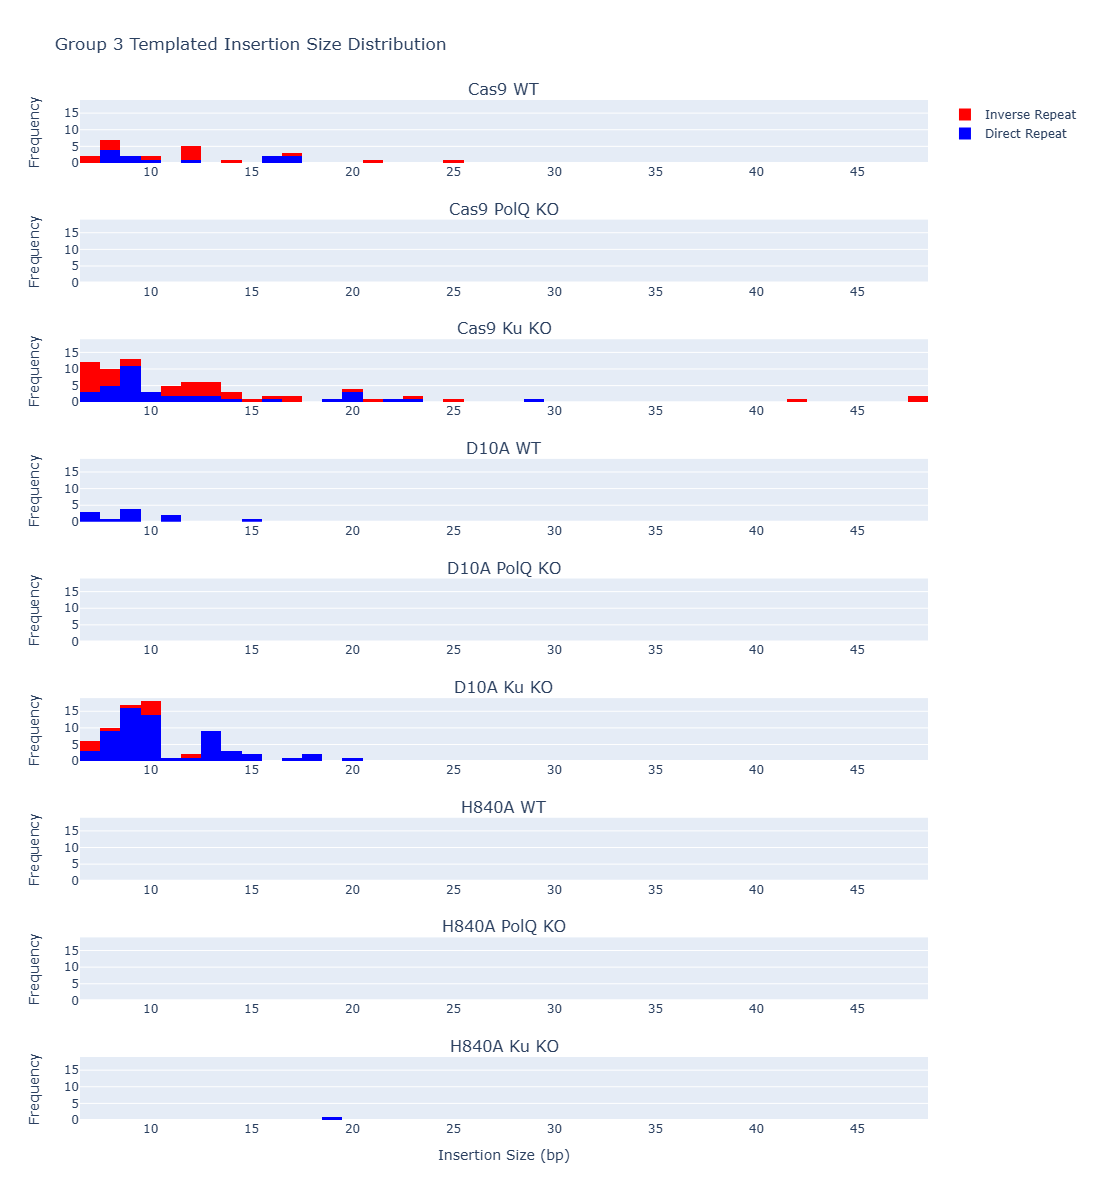

In [287]:
# Iterate over file paths
fig = make_subplots(rows=9, cols=1, shared_xaxes=True, shared_yaxes=True, 
                    subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "Cas9 Ku KO",
                                    "D10A WT", "D10A PolQ KO", "D10A Ku KO",
                                    "H840A WT", "H840A PolQ KO", "H840A Ku KO"))

g3s01p = "endseq/g3/g3s01_insertions_plus.txt"
g3s02p = "endseq/g3/g3s02_insertions_plus.txt"
g3s03p = "endseq/g3/g3s03_insertions_plus.txt"
g3s04p = "endseq/g3/g3s04_insertions_plus.txt"
g3s05p = "endseq/g3/g3s05_insertions_plus.txt"
g3s06p = "endseq/g3/g3s06_insertions_plus.txt"
g3s07p = "endseq/g3/g3s07_insertions_plus.txt"
g3s08p = "endseq/g3/g3s08_insertions_plus.txt"
g3s09p = "endseq/g3/g3s09_insertions_plus.txt"

g3s01m = "endseq/g3/g3s01_insertions_minus.txt"
g3s02m = "endseq/g3/g3s02_insertions_minus.txt"
g3s03m = "endseq/g3/g3s03_insertions_minus.txt"
g3s04m = "endseq/g3/g3s04_insertions_minus.txt"
g3s05m = "endseq/g3/g3s05_insertions_minus.txt"
g3s06m = "endseq/g3/g3s06_insertions_minus.txt"
g3s07m = "endseq/g3/g3s07_insertions_minus.txt"
g3s08m = "endseq/g3/g3s08_insertions_minus.txt"
g3s09m = "endseq/g3/g3s09_insertions_minus.txt"


file_paths = [g3s01p, g3s01m,
              g3s04p, g3s04m,
              g3s07p, g3s07m,
              g3s02p, g3s02m,
              g3s05p, g3s05m,
              g3s08p, g3s08m,
              g3s03p, g3s03m,
              g3s06p, g3s06m,
              g3s09p, g3s09m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 2 + 1
    # Check if file is not empty
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        # Add histogram trace
        if (i % 2) == 0:
            fig.add_trace(go.Histogram(x=data[3].values, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=1)
            DirectLegend = False
        else:
            fig.add_trace(go.Histogram(x=data[3].values, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       showlegend = InverseLegend,marker=dict(color='red')), row=row, col=1)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Histogram(x=[], y=[]), row=row, col=1)
        
    fig.update_yaxes(title_text="Frequency", row=row, col=1, automargin=True)

fig.update_layout(barmode='stack',title_text="Group 3 Templated Insertion Size Distribution")

fig.update_layout(
    autosize=False,
    width=1100,
    height=1200,
)

fig.update_xaxes(title_text="Insertion Size (bp)", row=9, col=1, automargin=True)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
        "yaxis3": {"matches": "y", "showticklabels": True},
        "yaxis4": {"matches": "y", "showticklabels": True},
        "yaxis5": {"matches": "y", "showticklabels": True},
        "yaxis6": {"matches": "y", "showticklabels": True},
        "yaxis7": {"matches": "y", "showticklabels": True},
        "yaxis8": {"matches": "y", "showticklabels": True},
        "yaxis9": {"matches": "y", "showticklabels": True},

    }
)

fig.update_layout(
    {
        "xaxis": {"matches": None, "showticklabels": True},
        "xaxis2": {"matches": "x", "showticklabels": True},
        "xaxis3": {"matches": "x", "showticklabels": True},
        "xaxis4": {"matches": "x", "showticklabels": True},
        "xaxis5": {"matches": "x", "showticklabels": True},
        "xaxis6": {"matches": "x", "showticklabels": True},
        "xaxis7": {"matches": "x", "showticklabels": True},
        "xaxis8": {"matches": "x", "showticklabels": True},
        "xaxis9": {"matches": "x", "showticklabels": True},
    }
)

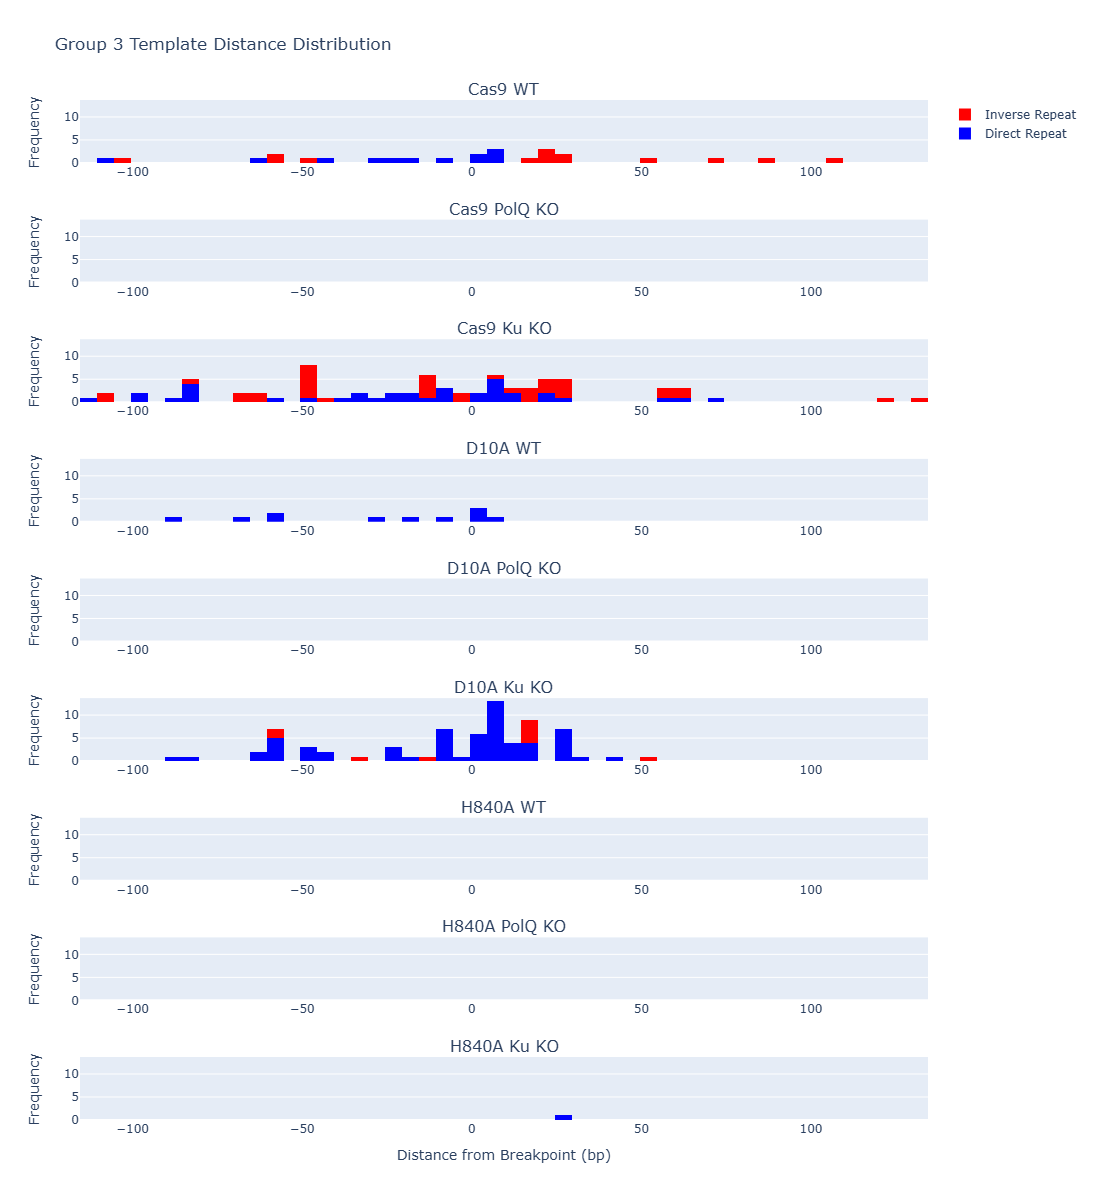

In [288]:
# Iterate over file paths
fig = make_subplots(rows=9, cols=1, shared_xaxes=True, shared_yaxes=True, 
                    subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "Cas9 Ku KO",
                                    "D10A WT", "D10A PolQ KO", "D10A Ku KO",
                                    "H840A WT", "H840A PolQ KO", "H840A Ku KO"))

g3s01p = "endseq/g3/g3s01_insertions_plus.txt"
g3s02p = "endseq/g3/g3s02_insertions_plus.txt"
g3s03p = "endseq/g3/g3s03_insertions_plus.txt"
g3s04p = "endseq/g3/g3s04_insertions_plus.txt"
g3s05p = "endseq/g3/g3s05_insertions_plus.txt"
g3s06p = "endseq/g3/g3s06_insertions_plus.txt"
g3s07p = "endseq/g3/g3s07_insertions_plus.txt"
g3s08p = "endseq/g3/g3s08_insertions_plus.txt"
g3s09p = "endseq/g3/g3s09_insertions_plus.txt"

g3s01m = "endseq/g3/g3s01_insertions_minus.txt"
g3s02m = "endseq/g3/g3s02_insertions_minus.txt"
g3s03m = "endseq/g3/g3s03_insertions_minus.txt"
g3s04m = "endseq/g3/g3s04_insertions_minus.txt"
g3s05m = "endseq/g3/g3s05_insertions_minus.txt"
g3s06m = "endseq/g3/g3s06_insertions_minus.txt"
g3s07m = "endseq/g3/g3s07_insertions_minus.txt"
g3s08m = "endseq/g3/g3s08_insertions_minus.txt"
g3s09m = "endseq/g3/g3s09_insertions_minus.txt"


file_paths = [g3s01p, g3s01m,
              g3s04p, g3s04m,
              g3s07p, g3s07m,
              g3s02p, g3s02m,
              g3s05p, g3s05m,
              g3s08p, g3s08m,
              g3s03p, g3s03m,
              g3s06p, g3s06m,
              g3s09p, g3s09m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 2 + 1
    # Check if file is not empty
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        # Add histogram trace
        if (i % 2) == 0:
            dist = data[8] - 119
            fig.add_trace(go.Histogram(x=dist, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=1)
            DirectLegend = False
        else:
            dist = data[8] - 119
            fig.add_trace(go.Histogram(x=dist, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       showlegend = InverseLegend,marker=dict(color='red')), row=row, col=1)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Histogram(x=[], y=[]), row=row, col=1)
        
    fig.update_yaxes(title_text="Frequency", row=row, col=1, automargin=True)

fig.update_layout(barmode='stack',title_text="Group 3 Template Distance Distribution")

fig.update_layout(
    autosize=False,
    width=1100,
    height=1200,
)

fig.update_xaxes(title_text="Distance from Breakpoint (bp)", row=9, col=1, automargin=True)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
        "yaxis3": {"matches": "y", "showticklabels": True},
        "yaxis4": {"matches": "y", "showticklabels": True},
        "yaxis5": {"matches": "y", "showticklabels": True},
        "yaxis6": {"matches": "y", "showticklabels": True},
        "yaxis7": {"matches": "y", "showticklabels": True},
        "yaxis8": {"matches": "y", "showticklabels": True},
        "yaxis9": {"matches": "y", "showticklabels": True},

    }
)

fig.update_layout(
    {
        "xaxis": {"matches": None, "showticklabels": True},
        "xaxis2": {"matches": "x", "showticklabels": True},
        "xaxis3": {"matches": "x", "showticklabels": True},
        "xaxis4": {"matches": "x", "showticklabels": True},
        "xaxis5": {"matches": "x", "showticklabels": True},
        "xaxis6": {"matches": "x", "showticklabels": True},
        "xaxis7": {"matches": "x", "showticklabels": True},
        "xaxis8": {"matches": "x", "showticklabels": True},
        "xaxis9": {"matches": "x", "showticklabels": True},
    }
)

# Current

In [478]:
file_paths = [g2s01p, g2s01m, g2s04p, g2s04m, g2s02p, g2s02m, g2s05p, g2s05m, g2s03p, g2s03m, g2s06p, g2s06m]
samples = ["Cas9 WT", "Cas9 PolQ KO",
           "D10A WT", "D10A PolQ KO", 
           "H840A WT", "H840A PolQ KO"]
strands = ["Plus", "Minus"]

DirectLegend = True
InverseLegend = True

df = pd.DataFrame()

appended_data = []

for i, file_path in enumerate(file_paths):
    #print(i, file_path)
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        samplecount = i // 2
        strandcount = i % 2
        data["Sample"] = samples[samplecount]
        #print(samples[samplecount])
        data["Strand"] = strands[strandcount]
        #print(strands[strandcount])
        appended_data.append(data)
        
appended_df = pd.concat(appended_data)
appended_df['Sample'] = pd.Categorical(appended_df['Sample'], categories=samples)
appended_df = appended_df.rename(columns={3: 'Insertion Size'})
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.swarmplot(data=appended_df, x="Sample", y="Insertion Size", hue="Strand")
plt.xlabel('Sample')
plt.ylabel('Insertion Size')
plt.title('Group 2 Templated Insertion Size Distribution')
plt.savefig('group2_swarmplot.png', dpi=300)

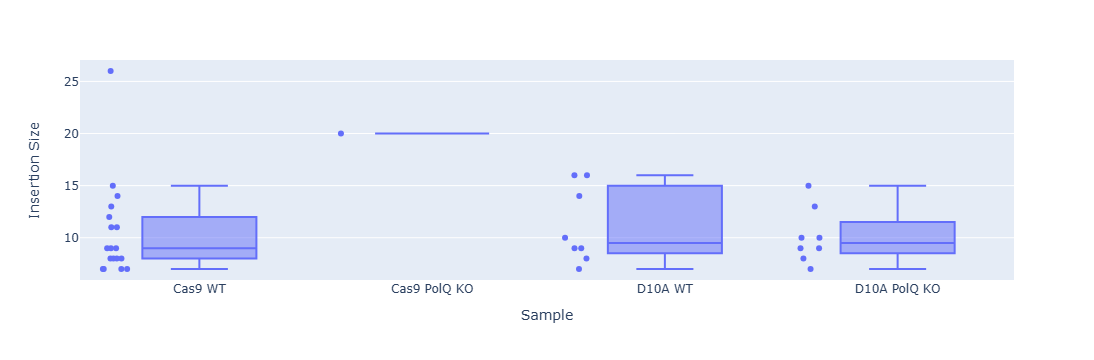

In [465]:
import plotly.express as px
df = px.data.tips()
fig = px.box(appended_df, x="Sample", y="Insertion Size", points="all", color=)
fig.show()

In [477]:
file_paths = [g3s01p, g3s01m,
              g3s04p, g3s04m,
              g3s07p, g3s07m,
              g3s02p, g3s02m,
              g3s05p, g3s05m,
              g3s08p, g3s08m,
              g3s03p, g3s03m,
              g3s06p, g3s06m,
              g3s09p, g3s09m]

samples = ["Cas9 WT", "Cas9 PolQ KO", "Cas9 Ku KO",
            "D10A WT", "D10A PolQ KO", "D10A Ku KO",
            "H840A WT", "H840A PolQ KO", "H840A Ku KO"]
strands = ["Plus", "Minus"]

DirectLegend = True
InverseLegend = True

df = pd.DataFrame()

appended_data = []

for i, file_path in enumerate(file_paths):
    #print(i, file_path)
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        samplecount = i // 2
        strandcount = i % 2
        data["Sample"] = samples[samplecount]
        #print(samples[samplecount])
        data["Strand"] = strands[strandcount]
        #print(strands[strandcount])
        appended_data.append(data)
        
appended_df = pd.concat(appended_data)
appended_df['Sample'] = pd.Categorical(appended_df['Sample'], categories=samples)
appended_df = appended_df.rename(columns={3: 'Insertion Size'})

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.swarmplot(data=appended_df, x="Sample", y="Insertion Size", hue="Strand")
plt.xlabel('Sample')
plt.ylabel('Insertion Size')
plt.title('Group 3 Templated Insertion Size Distribution')
plt.savefig('group3_swarmplot.png', dpi=300)

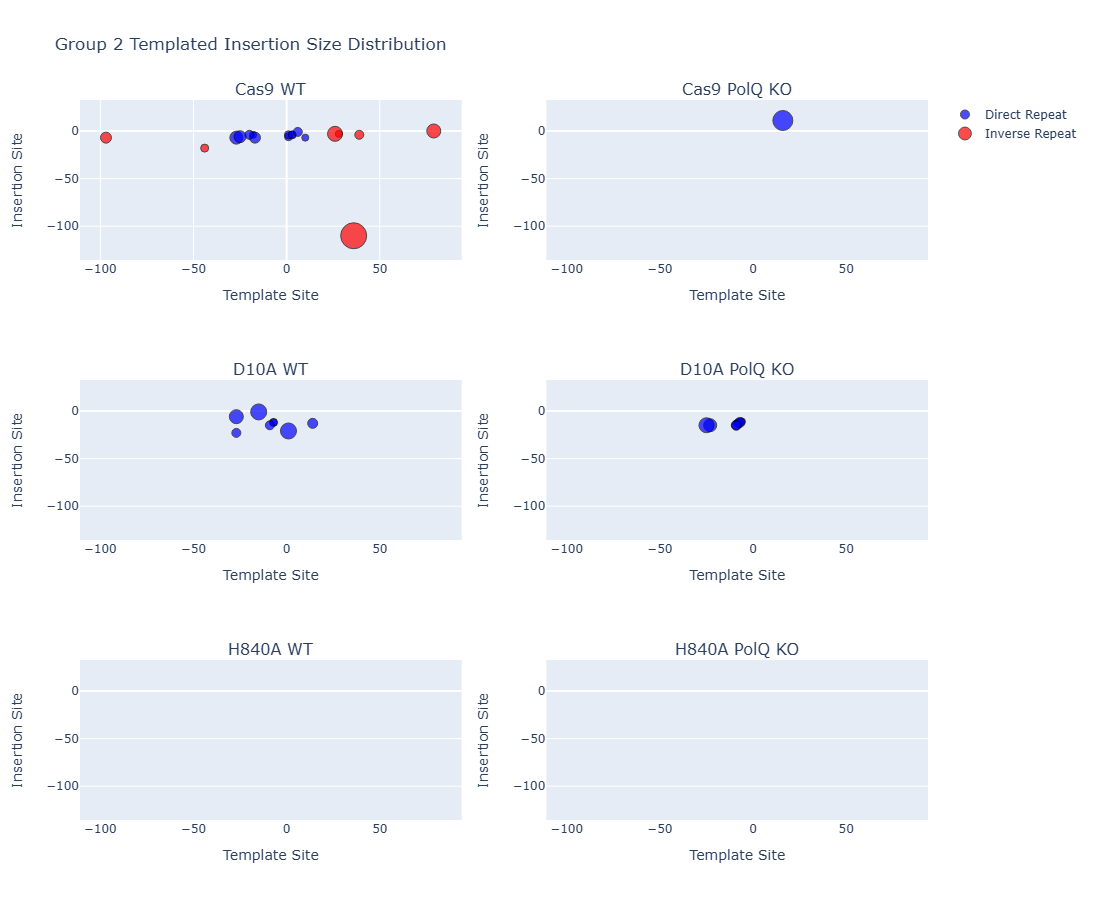

In [387]:
# Iterate over file paths
fig = make_subplots(rows=3, cols=2, shared_xaxes=True, shared_yaxes=True, subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "D10A WT", "D10A PolQ KO", "H840A WT", "H840A PolQ KO"))

g2s01p = "endseq/g2/g2s01_insertions_plus.csv"
g2s02p = "endseq/g2/g2s02_insertions_plus.csv"
g2s03p = "endseq/g2/g2s03_insertions_plus.csv"
g2s04p = "endseq/g2/g2s04_insertions_plus.csv"
g2s05p = "endseq/g2/g2s05_insertions_plus.csv"
g2s06p = "endseq/g2/g2s06_insertions_plus.csv"

g2s01m = "endseq/g2/g2s01_insertions_minus.csv"
g2s02m = "endseq/g2/g2s02_insertions_minus.csv"
g2s03m = "endseq/g2/g2s03_insertions_minus.csv"
g2s04m = "endseq/g2/g2s04_insertions_minus.csv"
g2s05m = "endseq/g2/g2s05_insertions_minus.csv"
g2s06m = "endseq/g2/g2s06_insertions_minus.csv"

file_paths = [g2s01p, g2s01m, g2s04p, g2s04m, g2s02p, g2s02m, g2s05p, g2s05m, g2s03p, g2s03m, g2s06p, g2s06m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 4 + 1
    if i % 4 < 2:
        column = 1
    else:
        column = 2
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        seqname = data[0]            
        split_seqname = seqname.str.split("_", expand=True)
        insertion_sites = split_seqname[3].astype(int) - 119
        insertion_size = data[3]
        # Add histogram trace
        dist = data[8] - 119
        
        if (i % 2) == 0:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_sites,
                mode='markers',
                showlegend = DirectLegend,
                marker=dict(
                    size=insertion_size,
                    color='blue',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Direct Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       #showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=column)
            DirectLegend = False
        else:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_sites,
                mode='markers',
                showlegend = InverseLegend,
                marker=dict(
                    size=insertion_size,
                    color='red',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Inverse Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       #showlegend = InverseLegend,marker=dict(color='red')), row=row, col=column)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Histogram(x=[], y=[]), row=row, col=column)
        
fig.update_layout(barmode='stack',title_text="Group 2 Templated Insertion Size Distribution")

fig.update_layout(
    autosize=False,
    width=1000,
    height=900,
)

fig.update_yaxes(title_text="Insertion Site", row=1, col=1, automargin=True)
fig.update_yaxes(title_text="Insertion Site", row=2, col=1, automargin=True)
fig.update_yaxes(title_text="Insertion Site", row=3, col=1, automargin=True)
fig.update_yaxes(title_text="Insertion Site", row=1, col=2, automargin=True)
fig.update_yaxes(title_text="Insertion Site", row=2, col=2, automargin=True)
fig.update_yaxes(title_text="Insertion Site", row=3, col=2, automargin=True)

fig.update_xaxes(title_text="Template Site", row=1, col=1, automargin=True)
fig.update_xaxes(title_text="Template Site", row=2, col=1, automargin=True)
fig.update_xaxes(title_text="Template Site", row=3, col=1, automargin=True)
fig.update_xaxes(title_text="Template Site", row=1, col=2, automargin=True)
fig.update_xaxes(title_text="Template Site", row=2, col=2, automargin=True)
fig.update_xaxes(title_text="Template Site", row=3, col=2, automargin=True)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
        "yaxis3": {"matches": "y", "showticklabels": True},
        "yaxis4": {"matches": "y", "showticklabels": True},
        "yaxis5": {"matches": "y", "showticklabels": True},
        "yaxis6": {"matches": "y", "showticklabels": True}
    }
)

fig.update_layout(
    {
        "xaxis": {"matches": None, "showticklabels": True},
        "xaxis2": {"matches": "x", "showticklabels": True},
        "xaxis3": {"matches": "x", "showticklabels": True},
        "xaxis4": {"matches": "x", "showticklabels": True},
        "xaxis5": {"matches": "x", "showticklabels": True},
        "xaxis6": {"matches": "x", "showticklabels": True}
    }
)

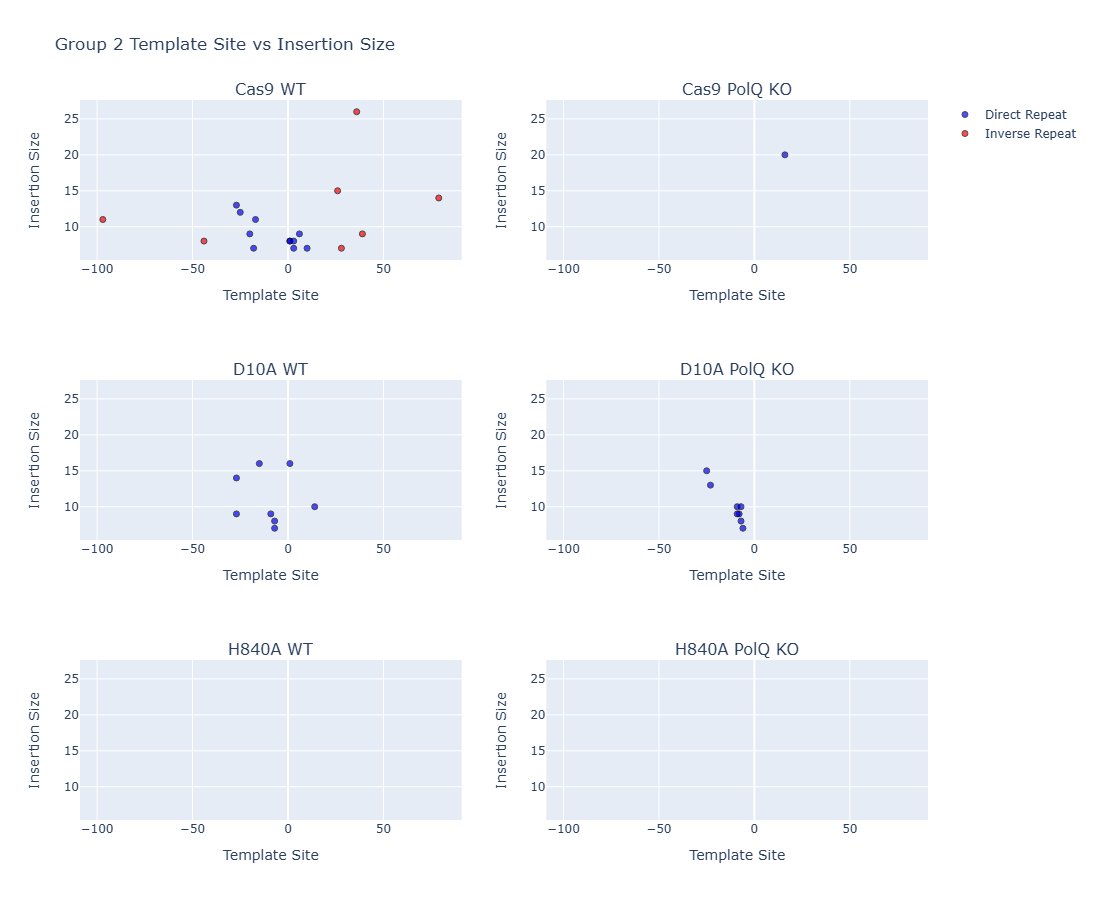

In [490]:
# Iterate over file paths
fig = make_subplots(rows=3, cols=2, shared_xaxes=True, shared_yaxes=True, subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "D10A WT", "D10A PolQ KO", "H840A WT", "H840A PolQ KO"))
file_paths = [g2s01p, g2s01m, g2s04p, g2s04m, g2s02p, g2s02m, g2s05p, g2s05m, g2s03p, g2s03m, g2s06p, g2s06m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 4 + 1
    if i % 4 < 2:
        column = 1
    else:
        column = 2
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        seqname = data[0]            
        split_seqname = seqname.str.split("_", expand=True)
        insertion_sites = split_seqname[3].astype(int) - 119
        insertion_size = data[3]
        # Add histogram trace
        dist = data[8] - 119
        
        if (i % 2) == 0:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_size,
                mode='markers',
                showlegend = DirectLegend,
                marker=dict(
                    color='blue',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Direct Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       #showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=column)
            DirectLegend = False
        else:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_size,
                mode='markers',
                showlegend = InverseLegend,
                marker=dict(
                    color='red',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Inverse Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       #showlegend = InverseLegend,marker=dict(color='red')), row=row, col=column)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Scatter(x=[], y=[]), row=row, col=column)
        
fig.update_layout(barmode='stack',title_text="Group 2 Template Site vs Insertion Size")

fig.update_layout(
    autosize=False,
    width=1000,
    height=900,
)

rows = 3
cols = 2


for row in range(1, rows + 1):
    for col in range(1, cols + 1):
        # Update the x-axis title for each subplot
        fig.update_yaxes(title_text="Insertion Size", row=row, col=col, automargin=True)
        fig.update_xaxes(title_text="Template Site", row=row, col=col, automargin=True)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
        "yaxis3": {"matches": "y", "showticklabels": True},
        "yaxis4": {"matches": "y", "showticklabels": True},
        "yaxis5": {"matches": "y", "showticklabels": True},
        "yaxis6": {"matches": "y", "showticklabels": True}
    }
)

fig.update_layout(
    {
        "xaxis": {"matches": None, "showticklabels": True},
        "xaxis2": {"matches": "x", "showticklabels": True},
        "xaxis3": {"matches": "x", "showticklabels": True},
        "xaxis4": {"matches": "x", "showticklabels": True},
        "xaxis5": {"matches": "x", "showticklabels": True},
        "xaxis6": {"matches": "x", "showticklabels": True}
    }
)

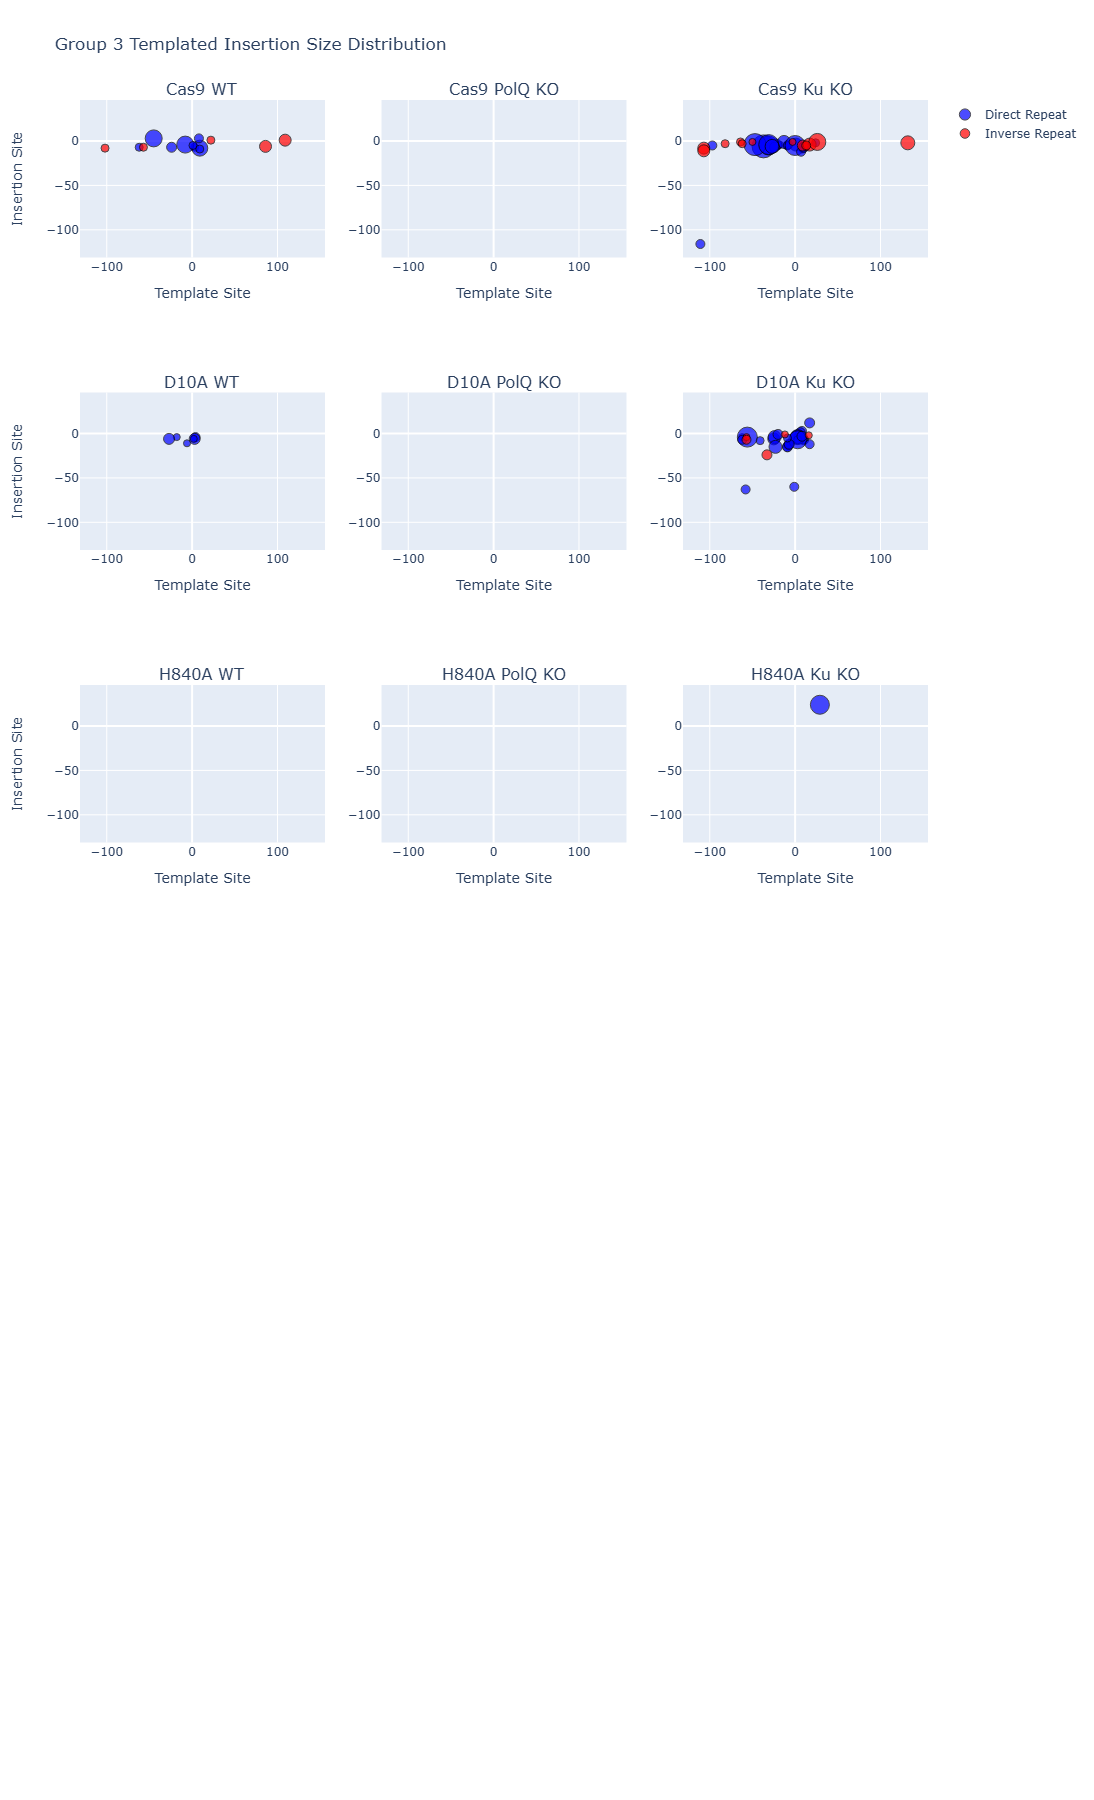

In [483]:
# Iterate over file paths
fig = make_subplots(rows=6, cols=3, shared_xaxes=True, shared_yaxes=True, 
                    subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "Cas9 Ku KO",
                                    "D10A WT", "D10A PolQ KO", "D10A Ku KO",
                                    "H840A WT", "H840A PolQ KO", "H840A Ku KO"))

g3s01p = "endseq/g3/g3s01_insertions_plus.csv"
g3s02p = "endseq/g3/g3s02_insertions_plus.csv"
g3s03p = "endseq/g3/g3s03_insertions_plus.csv"
g3s04p = "endseq/g3/g3s04_insertions_plus.csv"
g3s05p = "endseq/g3/g3s05_insertions_plus.csv"
g3s06p = "endseq/g3/g3s06_insertions_plus.csv"
g3s07p = "endseq/g3/g3s07_insertions_plus.csv"
g3s08p = "endseq/g3/g3s08_insertions_plus.csv"
g3s09p = "endseq/g3/g3s09_insertions_plus.csv"

g3s01m = "endseq/g3/g3s01_insertions_minus.csv"
g3s02m = "endseq/g3/g3s02_insertions_minus.csv"
g3s03m = "endseq/g3/g3s03_insertions_minus.csv"
g3s04m = "endseq/g3/g3s04_insertions_minus.csv"
g3s05m = "endseq/g3/g3s05_insertions_minus.csv"
g3s06m = "endseq/g3/g3s06_insertions_minus.csv"
g3s07m = "endseq/g3/g3s07_insertions_minus.csv"
g3s08m = "endseq/g3/g3s08_insertions_minus.csv"
g3s09m = "endseq/g3/g3s09_insertions_minus.csv"


file_paths = [g3s01p, g3s01m,
              g3s04p, g3s04m,
              g3s07p, g3s07m,
              g3s02p, g3s02m,
              g3s05p, g3s05m,
              g3s08p, g3s08m,
              g3s03p, g3s03m,
              g3s06p, g3s06m,
              g3s09p, g3s09m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 6 + 1
    if i % 6 < 2:
        column = 1
    elif i % 6 < 4:
        column = 2
    else:
        column = 3
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        seqname = data[0]            
        split_seqname = seqname.str.split("_", expand=True)
        insertion_sites = split_seqname[3].astype(int) - 119
        insertion_size = data[3]
        # Add histogram trace
        dist = data[8] - 119
        
        if (i % 2) == 0:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_sites,
                mode='markers',
                showlegend = DirectLegend,
                marker=dict(
                    size=insertion_size,
                    color='blue',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Direct Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       #showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=column)
            DirectLegend = False
        else:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_sites,
                mode='markers',
                showlegend = InverseLegend,
                marker=dict(
                    size=insertion_size,
                    color='red',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Inverse Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       #showlegend = InverseLegend,marker=dict(color='red')), row=row, col=column)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Scatter(x=[], y=[]), row=row, col=column)
        
fig.update_layout(title_text="Group 3 Templated Insertion Size Distribution")

fig.update_layout(
    autosize=False,
    width=1200,
    height=1800,
)

rows = 3
cols = 3

for row in range(1, rows + 1):
    fig.update_yaxes(title_text="Insertion Site", row=row, col=1, automargin=True)

for row in range(1, rows + 1):
    for col in range(1, cols + 1):
        # Update the x-axis title for each subplot
        fig.update_xaxes(title_text="Template Site", row=row, col=col, automargin=True)




fig.update_xaxes(matches='x',showticklabels=True)
fig.update_yaxes(matches='y',showticklabels=True)


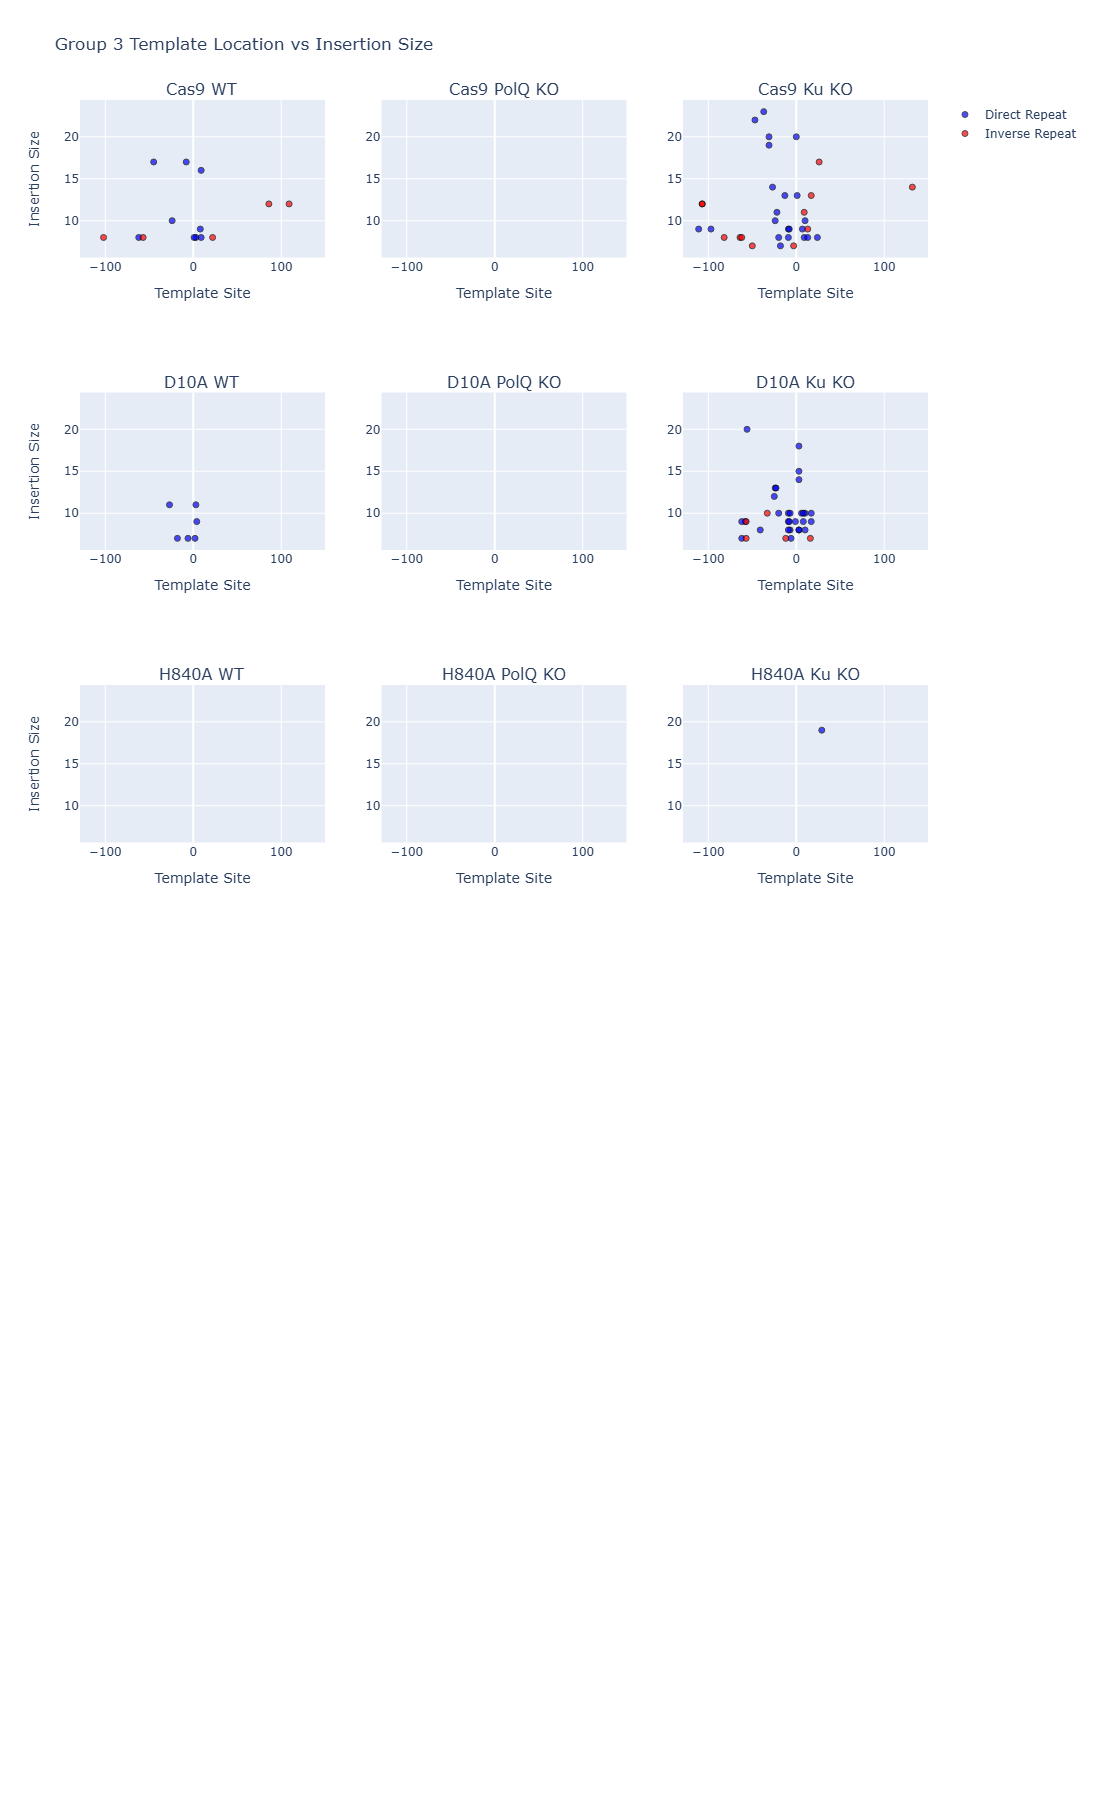

In [488]:
# Iterate over file paths
fig = make_subplots(rows=6, cols=3, shared_xaxes=True, shared_yaxes=True, 
                    subplot_titles=("Cas9 WT", "Cas9 PolQ KO", "Cas9 Ku KO",
                                    "D10A WT", "D10A PolQ KO", "D10A Ku KO",
                                    "H840A WT", "H840A PolQ KO", "H840A Ku KO"))

file_paths = [g3s01p, g3s01m,
              g3s04p, g3s04m,
              g3s07p, g3s07m,
              g3s02p, g3s02m,
              g3s05p, g3s05m,
              g3s08p, g3s08m,
              g3s03p, g3s03m,
              g3s06p, g3s06m,
              g3s09p, g3s09m]

DirectLegend = True
InverseLegend = True

for i, file_path in enumerate(file_paths):
    row = i // 6 + 1
    if i % 6 < 2:
        column = 1
    elif i % 6 < 4:
        column = 2
    else:
        column = 3
    if os.path.getsize(file_path) > 0:
        data = pd.read_csv(file_path, delimiter='\t', header=None)
        seqname = data[0]            
        split_seqname = seqname.str.split("_", expand=True)
        insertion_sites = split_seqname[3].astype(int) - 119
        insertion_size = data[3]
        # Add histogram trace
        dist = data[8] - 119
        
        if (i % 2) == 0:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_size,
                mode='markers',
                showlegend = DirectLegend,
                marker=dict(
                    color='blue',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Direct Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Direct Repeat", 
                                       #showlegend = DirectLegend, marker=dict(color='blue')), row=row, col=column)
            DirectLegend = False
        else:
            fig.add_trace(go.Scatter(
                x=dist,
                y=insertion_size,
                mode='markers',
                showlegend = InverseLegend,
                marker=dict(
                    color='red',  # Set color to red
                    opacity=0.7,
                    line=dict(
                        color='black',
                        width=1
                    )
                ),
                name="Inverse Repeat"
            ),row=row, col=column)
            #fig.add_trace(go.Histogram(x=dist, y=insertion_sites, nbinsx=50, bingroup=1, name="Inverse Repeat",
                                       #showlegend = InverseLegend,marker=dict(color='red')), row=row, col=column)
            InverseLegend = False
    else:
        # Add empty trace
        fig.add_trace(go.Scatter(x=[], y=[]), row=row, col=column)
        
fig.update_layout(title_text="Group 3 Template Location vs Insertion Size")

fig.update_layout(
    autosize=False,
    width=1200,
    height=1800,
)

rows = 3
cols = 3

for row in range(1, rows + 1):
    fig.update_yaxes(title_text="Insertion Size", row=row, col=1, automargin=True)

for row in range(1, rows + 1):
    for col in range(1, cols + 1):
        # Update the x-axis title for each subplot
        fig.update_xaxes(title_text="Template Site", row=row, col=col, automargin=True)
        
fig.update_xaxes(matches='x',showticklabels=True)
fig.update_yaxes(matches='y',showticklabels=True)


In [291]:
def transform_pairs(pairs):
    transformed_pairs = []
    a = 1
    b = 1
    for i, (x, y) in enumerate(pairs):
        transformed_pairs.append((a, b))
        if (i + 1) % 2 == 0:
            a += 1
            b = 1  # Reset b to 1 when a increments
        else:
            b += 1
    return transformed_pairs

# Example pairs
pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11)]

# Transform pairs
transformed_pairs = transform_pairs(pairs)

# Output
print(transformed_pairs)

[(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2)]


In [298]:
def transform_numbers(numbers):
    transformed_pairs = []
    a = 1
    b = 1
    for num in numbers:
        transformed_pairs.append((a, b))
        b += 1
        if b > 2:
            b = 1
            a += 1
    return transformed_pairs

# Example input
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Transform input numbers
transformed_pairs = transform_numbers(numbers)

# Output
print(transformed_pairs)

[(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2), (4, 1), (4, 2), (5, 1), (5, 2), (6, 1), (6, 2)]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('WT_PolQ_5967.csv')  # Replace 'your_file.csv' with the path to your CSV file
df.fillna(0, inplace=True)

# Assign variables to columns
upstream_deletion = df['Upstream Deletion']
downstream_deletion = df['Downstream Deletion']
mh_size = df['MH Size']
samples = df['Sample']

# Define colors for samples
sample_colors = {'WT': 'red', 'POLQ': 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))

for sample in df['Sample'].unique():
    mask = df['Sample'] == sample
    sample_df = df[mask]
    upstream_deletion = sample_df['Upstream Deletion']
    downstream_deletion = sample_df['Downstream Deletion']
    plt.scatter(upstream_deletion, downstream_deletion, s=(sample_df['MH Size']*10), c=sample_colors[sample], label=sample, alpha=0.5)
    
    # Perform linear regression
    X = upstream_deletion.values.reshape(-1, 1)
    y = downstream_deletion.values
    weights = sample_df['Count'].values  # Assuming 'weight' is the column representing weights
    reg = LinearRegression().fit(X, y, sample_weight=weights)

    # Plot the best-fit line for the current sample
    plt.plot(X, reg.predict(X), color=sample_colors[sample], linewidth=2, label=f'Best Fit Line ({sample})')

plt.axis('square')
# Add labels and title
plt.xlabel('Upstream Deletion')
plt.ylabel('Downstream Deletion')
plt.title('WT vs PolQ 5967')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.grid(True)

# Extra

In [ ]:
def plot_g3_insertions_histogram(pp, mp, pqpp, pqmp, kupp, kump, titletext):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("WT", "PolQ KO"))
    if os.path.getsize(pp) > 0:
        plus = pd.read_csv(pp,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=plus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 1, 1)

    if os.path.getsize(mp) > 0:
        minus = pd.read_csv(mp,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=minus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 1, 1)
        
    if os.path.getsize(pqpp) > 0:
        polqplus = pd.read_csv(pqpp,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=polqplus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 2, 1)

    if os.path.getsize(pqmp) > 0:
        polqminus = pd.read_csv(pqmp,delimiter='\t',header=None)
        fig.add_trace(go.Histogram(x=polqminus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 2, 1)
    # The two histograms are drawn on top of another
    fig.update_layout(barmode='stack',title_text=titletext)
    
    fig.update_xaxes(title_text="Insertion Size", row=2, col=1)
    
    fig.update_yaxes(title_text="Frequency", row=1, col=1)
    fig.update_yaxes(title_text="Frequency", row=2, col=1)
    
    fig.update_layout(
        {
            "yaxis": {"matches": None},
            "yaxis2": {"matches": "y", "showticklabels": True},
        }
    )
    return fig

In [ ]:
import plotly.graph_objects as go

import numpy as np

plus = pd.read_csv("endseq/g2s01_insertions_plus.csv",delimiter='\t',header=None)
minus = pd.read_csv("endseq/g2s01_insertions_minus.csv",delimiter='\t',header=None)


from plotly.subplots import make_subplots

polqplus = pd.read_csv("endseq/g2s04_insertions_plus.csv",delimiter='\t',header=None)

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, shared_yaxes=True, subplot_titles=("WT", "PolQ KO"))

fig.add_trace(go.Histogram(x=plus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 1, 1)
fig.add_trace(go.Histogram(x=minus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')), 1, 1)
fig.add_trace(go.Histogram(x=polqplus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')), 2, 1)

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 WT vs PolQ")

fig.update_xaxes(title_text="Insertion Size", row=2, col=1)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)

fig.update_layout(
    {
        "yaxis": {"matches": None},
        "yaxis2": {"matches": "y", "showticklabels": True},
    }
)
fig.show()

In [ ]:
fig = go.Figure()

# Path to the file
pluspath = "/gpfs/home/asun/endseq/g2s02_insertions_plus.csv"
minuspath = "/gpfs/home/asun/endseq/g2s02_insertions_minus.csv"

# Check if the file is not empty
if os.path.getsize(pluspath) > 0:
    plus = pd.read_csv(pluspath,delimiter='\t',header=None)
    plusdist = plus[8] - 119
    fig.add_trace(go.Histogram(x=plusdist,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue'), showlegend=True))
else:
    # File is empty, handle accordingly
    print("File is empty")

# Check if the file is not empty
if os.path.getsize(minuspath) > 0:
    minus = pd.read_csv(minuspath,delimiter='\t',header=None)
    minusdist = minus[8] - 119
    fig.add_trace(go.Histogram(x=minusdist,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red'), showlegend=True))
else:
    # File is empty, handle accordingly
    print("File is empty")


# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 D10A Distribution Around Breakpoint")
fig.update_layout(xaxis_title="Distance to the Template", yaxis_title="Frequency")

fig.show()

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
plus = pd.read_csv("endseq/g2s01_insertions_plus.csv", delimiter='\t', header=None)
minus = pd.read_csv("endseq/g2s01_insertions_minus.csv", delimiter='\t', header=None)
polqplus = pd.read_csv("endseq/g2s04_insertions_plus.csv", delimiter='\t', header=None)

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

# Plot histograms
sns.histplot(data=[plus[3], minus[3]], bins=50, color=['blue', 'red'], label=['Direct Repeat', 'Indirect Repeat'], ax=axes[0], multiple='stack')
sns.histplot(polqplus[3], bins=50, color='blue', ax=axes[1], label="Direct Repeat")

# Set titles and labels
axes[0].set_title("Cas9 WT vs PolQ")
axes[0].set_ylabel("Frequency")
axes[1].set_xlabel("Insertion Size")
axes[1].set_ylabel("Frequency")

# Add legend
axes[0].legend()

# Show plot
plt.tight_layout()
plt.show()


ValueError: number of labels (2) does not match number of bars (50).

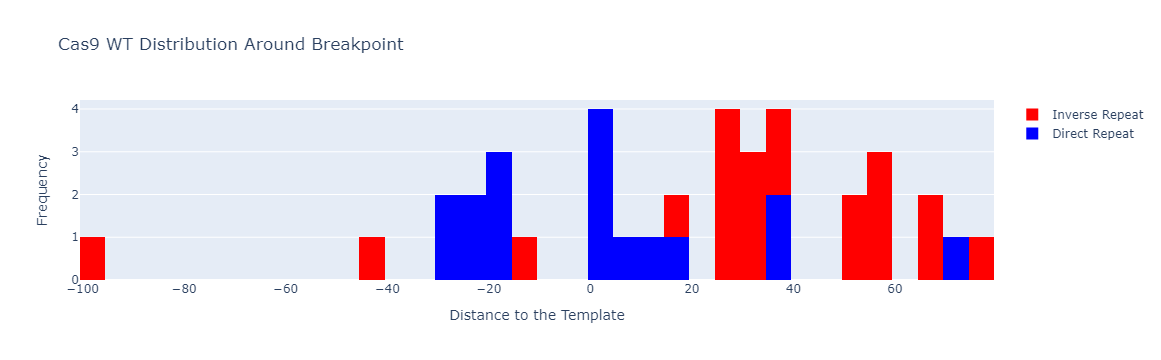

In [165]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

plus = pd.read_csv("endseq/g2s01_insertions_plus.csv",delimiter='\t',header=None)
minus = pd.read_csv("endseq/g2s01_insertions_minus.csv",delimiter='\t',header=None)
plusdist = plus[8] - 119
minusdist = minus[8] - 119
fig = go.Figure()

fig.add_trace(go.Histogram(x=plusdist,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')))
fig.add_trace(go.Histogram(x=minusdist,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 WT Distribution Around Breakpoint")
fig.update_layout(xaxis_title="Distance to the Template", yaxis_title="Frequency")
fig.show()

File is empty


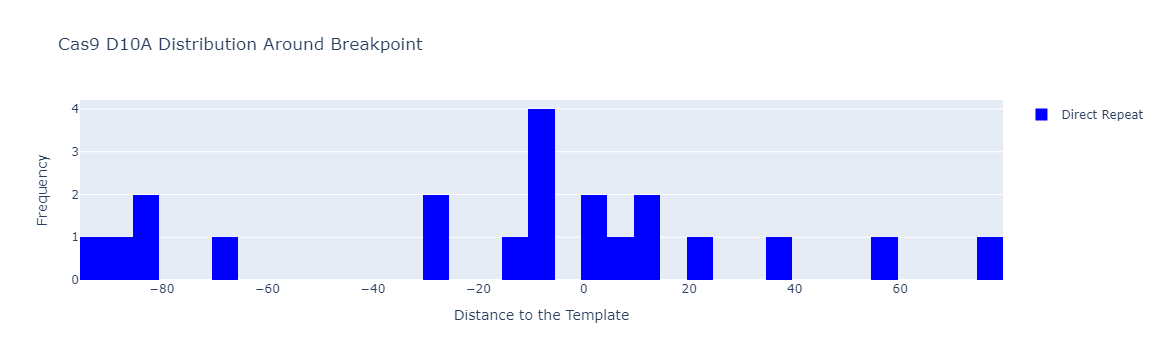

In [170]:
fig = go.Figure()

# Path to the file
pluspath = "/gpfs/home/asun/endseq/g2s02_insertions_plus.csv"
minuspath = "/gpfs/home/asun/endseq/g2s02_insertions_minus.csv"

# Check if the file is not empty
if os.path.getsize(pluspath) > 0:
    plus = pd.read_csv(pluspath,delimiter='\t',header=None)
    plusdist = plus[8] - 119
    fig.add_trace(go.Histogram(x=plusdist,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue'), showlegend=True))
else:
    # File is empty, handle accordingly
    print("File is empty")

# Check if the file is not empty
if os.path.getsize(minuspath) > 0:
    minus = pd.read_csv(minuspath,delimiter='\t',header=None)
    minusdist = minus[8] - 119
    fig.add_trace(go.Histogram(x=minusdist,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red'), showlegend=True))
else:
    # File is empty, handle accordingly
    print("File is empty")


# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 D10A Distribution Around Breakpoint")
fig.update_layout(xaxis_title="Distance to the Template", yaxis_title="Frequency")

fig.show()

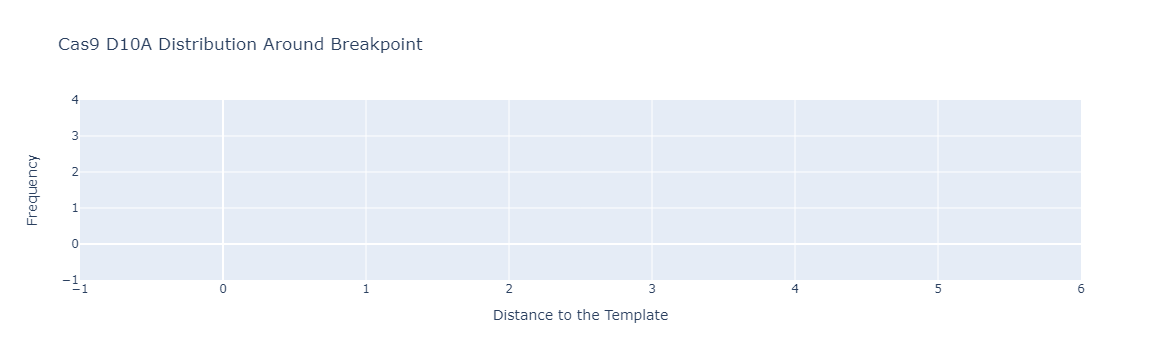

In [172]:
def plot_insertions_histogram(pluspath, minuspath):
    # Create the figure
    fig = go.Figure()
    
    # Check if the file is not empty
    if os.path.getsize(pluspath) > 0:
        plus = pd.read_csv(pluspath, delimiter='\t', header=None)
        plusdist = plus[8] - 119
        fig.add_trace(go.Histogram(x=plusdist, nbinsx=50, bingroup=1, name="Direct Repeat", marker=dict(color='blue'), showlegend=True))
    
    # Check if the file is not empty
    if os.path.getsize(minuspath) > 0:
        minus = pd.read_csv(minuspath, delimiter='\t', header=None)
        minusdist = minus[8] - 119
        fig.add_trace(go.Histogram(x=minusdist, nbinsx=50, bingroup=1, name="Inverse Repeat", marker=dict(color='red'), showlegend=True))
    
    # Update layout
    fig.update_layout(barmode='stack', title_text="Cas9 D10A Distribution Around Breakpoint", xaxis_title="Distance to the Template", yaxis_title="Frequency")
    
    return fig

# Path to the files
pluspath = "/gpfs/home/asun/endseq/g2s03_insertions_plus.csv"
minuspath = "/gpfs/home/asun/endseq/g2s03_insertions_minus.csv"

# Create the plot using the function
fig = plot_insertions_histogram(pluspath, minuspath)

# Show the plot
fig.show()

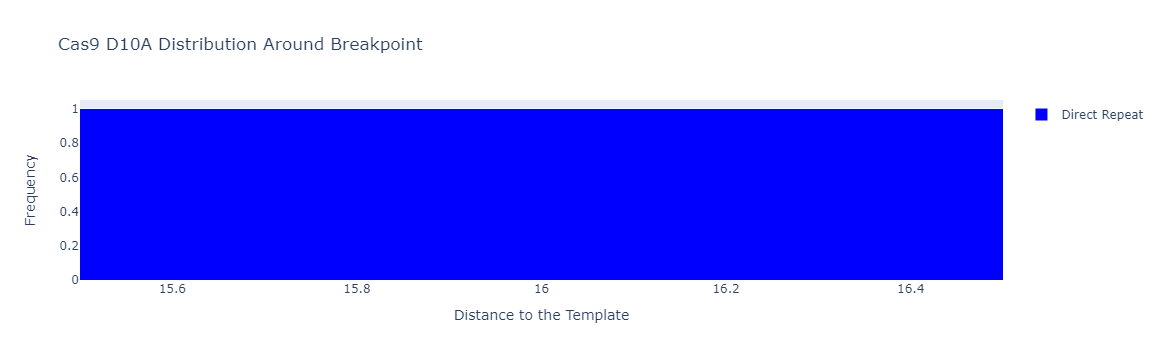

In [173]:
# Path to the files
pluspath = "/gpfs/home/asun/endseq/g2s04_insertions_plus.csv"
minuspath = "/gpfs/home/asun/endseq/g2s04_insertions_minus.csv"

# Create the plot using the function
fig = plot_insertions_histogram(pluspath, minuspath)

# Show the plot
fig.show()

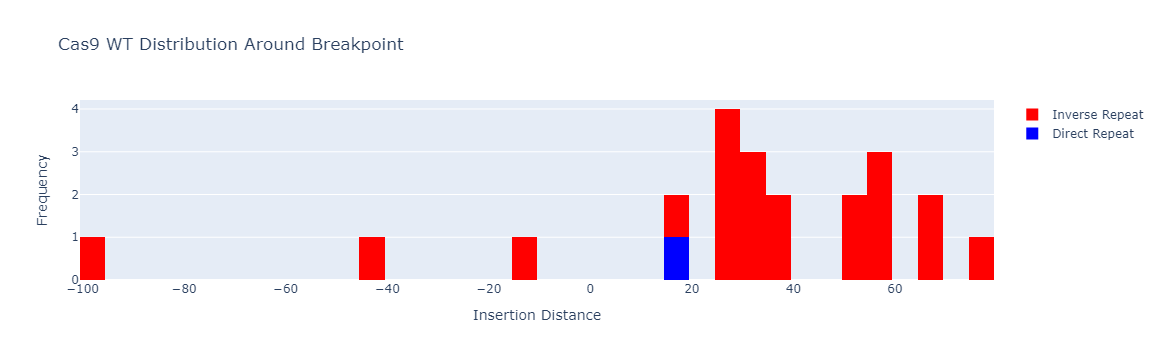

In [168]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

plus = pd.read_csv("endseq/g2s04_insertions_plus.csv",delimiter='\t',header=None)
#minus = pd.read_csv("endseq/g2s04_insertions_minus.csv",delimiter='\t',header=None)

plusdist = plus[8] - 119
#minusdist = minus[8] - 119

fig = go.Figure()

fig.add_trace(go.Histogram(x=plusdist,nbinsx=50,bingroup=1,name="Direct Repeat",marker=dict(color='blue')))
fig.add_trace(go.Histogram(x=minusdist,nbinsx=50,bingroup=1,name="Inverse Repeat",marker=dict(color='red')))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 WT Distribution Around Breakpoint")
fig.update_layout(xaxis_title="Insertion Distance", yaxis_title="Frequency")
fig.show()

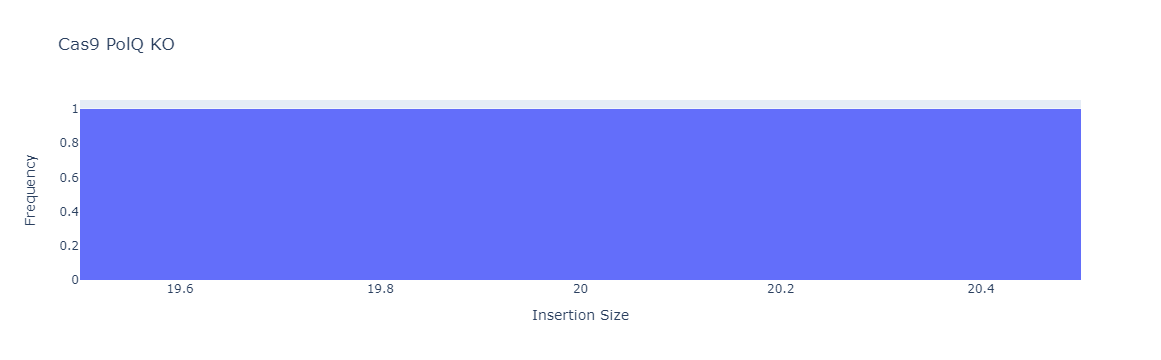

In [124]:
plus = pd.read_csv("endseq/g2s04_insertions_plus.csv",delimiter='\t',header=None)
#minus = pd.read_csv("endseq/g2s04_insertions_minus.csv",delimiter='\t',header=None)

fig = go.Figure()
fig.add_trace(go.Histogram(x=plus[3].values,nbinsx=50,bingroup=1,name="Direct Repeat"))
#fig.add_trace(go.Histogram(x=minus[3].values,nbinsx=50,bingroup=1,name="Inverse Repeat"))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack',title_text="Cas9 PolQ KO")
fig.update_layout(xaxis_title="Insertion Size", yaxis_title="Frequency")
fig.show()